<!-- Google Fonts -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #fff; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 10px; 
        font-size: 36px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🌆 Delhi Air Quality 😷
    </h1>
</div>


# 📂 Overview

**Background**

This dataset contains **daily air pollution records for Delhi**, spanning several years.
It includes concentrations of major pollutants — **PM2.5, PM10, NO₂, SO₂, CO, Ozone** — along with contextual information like **date, month, holidays, and weekday**.

Given Delhi's status as one of the most polluted cities globally, this dataset is valuable for **tracking pollution trends**, **forecasting air quality**, and **supporting policy decisions**.

**Goal of the Project**

Build a machine learning model to:

* **Predict the Air Quality Index (AQI)** based on pollution and temporal features
* Identify **key pollutants and time-based drivers** of poor air quality
* Help create **data-driven air pollution mitigation strategies**

**Key Features**

| Feature Name     | Description                                              |
| ---------------- | -------------------------------------------------------- |
| `Date`           | Day of the month (1–31)                                  |
| `Month`          | Month (1–12)                                             |
| `Year`           | Year of observation                                      |
| `Holidays_Count` | Number of holidays in the given day (may affect traffic) |
| `Days`           | Day of the week (1 = Monday, ..., 7 = Sunday)            |
| `PM2.5`          | Fine particulate matter (≤ 2.5 μm), µg/m³                |
| `PM10`           | Coarse particulate matter (≤ 10 μm), µg/m³               |
| `NO2`            | Nitrogen dioxide concentration, µg/m³                    |
| `SO2`            | Sulphur dioxide concentration, µg/m³                     |
| `CO`             | Carbon monoxide concentration, mg/m³                     |
| `Ozone`          | Ground-level ozone concentration, µg/m³                  |
| `AQI`            | Air Quality Index (target variable for regression)       |

**Files Provided**

* `final_dataset.csv`: Main dataset with daily pollutant readings and AQI scores.

**Project Objective**

The goal of this notebook is to **model and predict air quality in Delhi**, helping to:

* Issue early warnings during high-pollution days
* Understand which pollutants contribute most to AQI spikes
* Analyze seasonal or weekday effects on pollution
* Support long-term urban planning and environmental policy

**Key Steps**

* **Exploratory Data Analysis (EDA):** <br>
  Study AQI patterns across years, months, holidays, and days of the week.
  Analyze pollutant trends and their correlation with AQI.

* **Feature Engineering:**
  Create additional time features (e.g., weekend/weekday, seasons), handle outliers, normalize pollutant values if needed.

* **Modeling:**
  Use regression models to predict AQI:

  * Linear Regression
  * Random Forest Regressor
  * XGBoost / LightGBM
  * Time series methods (optional)

* **Evaluation Framework:**
  Use cross-validation and evaluate with:

  * RMSE (Root Mean Squared Error)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Import Libraries</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Import Libraries
    </h1>
</div>


In [73]:
# Core data manipulation libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
import shap

# Statistical functions
from scipy.stats import skew

# Display utilities for Jupyter notebooks
from IPython.display import display

# Machine learning preprocessing and modeling
from sklearn.model_selection import cross_val_score, KFold
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.preprocessing import OneHotEncoder, RobustScaler, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import optuna
optuna.logging.set_verbosity(optuna.logging.WARNING)

# Statistical
from scipy.stats import chi2_contingency
from scipy.stats import shapiro, probplot
from scipy.stats import mannwhitneyu
from scipy.stats import levene
from scipy.stats import ttest_ind
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from scipy.stats import kruskal
from scipy.stats import anderson
import scikit_posthocs as sp
from scipy.stats import normaltest

# Suppress warnings for cleaner output
import warnings
warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", 500) # To display all the columns of dataframe
pd.set_option("max_colwidth", None) # To set the width of the column to maximum

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Load Data</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Load Data
    </h1>
</div>


In [16]:
# Load the datasets
df_air = pd.read_csv("final_dataset.csv")
# Verify shapes
print("Data Shape:", df_air.shape)

Data Shape: (1461, 12)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preview and Info</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preview and Info
    </h1>
</div>


In [17]:
# Display few rows of dataset
print("Data Preview:")
display(df_air.head())

Data Preview:


,Date,Month,Year,Holidays_Count,Days,PM2.5,PM10,NO2,SO2,CO,Ozone,AQI
0,1,1,2021,0,5,408.80,442.42,160.61,12.95,2.77,43.19,462
1,2,1,2021,0,6,404.04,561.95,52.85,5.18,2.60,16.43,482
2,3,1,2021,1,7,225.07,239.04,170.95,10.93,1.40,44.29,263
3,4,1,2021,0,1,89.55,132.08,153.98,10.42,1.01,49.19,207
4,5,1,2021,0,2,54.06,55.54,122.66,9.70,0.64,48.88,149


In [18]:
# Display information about the DataFrames
print("Data Info:")
df_air.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


## Insights from Initial Data Exploration

**Dataset Size and Structure**  
   - The **dataset** contains **1461** samples with **12** columns, including the target variable `AQI`.

**Feature Overview**  
   - Both datasets include all important attributes:
     - **Numerical features:** `Date`, `PM2.5`, `PM10`, `NO2`, `SO2`, `CO`, and `Ozone`.
     - **Categorical features:** `Month`, `Year`, `Holidays_Count`, `Days`.
   - The target variable is **numerical** value.

**Data Completeness**  
   - The dataset have **no missing values**, we need to handle this issue.
   - Data types are appropriate: numerical features and categorical features are float64 and int64.

In [19]:
df_air.columns = (
    df_air.columns
    .str.strip()
)

In [24]:
num_features = ["Date", "PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone"]
cat_features = ["Month", "Year", "Holidays_Count", "Days"]

# Display information about the DataFrames
print("Data Info:")
df_air.info()

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Date            1461 non-null   int64  
 1   Month           1461 non-null   int64  
 2   Year            1461 non-null   int64  
 3   Holidays_Count  1461 non-null   int64  
 4   Days            1461 non-null   int64  
 5   PM2.5           1461 non-null   float64
 6   PM10            1461 non-null   float64
 7   NO2             1461 non-null   float64
 8   SO2             1461 non-null   float64
 9   CO              1461 non-null   float64
 10  Ozone           1461 non-null   float64
 11  AQI             1461 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 137.1 KB


In [25]:
print("Data describe:")
list_features_drop = ["Month", "Year", "Holidays_Count", "Days", "AQI"]
cm = sns.light_palette("blue", as_cmap=True)
display(df_air.drop(columns=list_features_drop, axis=1).describe().T.style.background_gradient(cmap=cm))

Data describe:


,count,mean,std,min,25%,50%,75%,max
Date,1461.000000,15.729637,8.803105,1.000000,8.000000,16.000000,23.000000,31.000000
PM2.5,1461.000000,90.774538,71.650579,0.050000,41.280000,72.060000,118.500000,1000.000000
PM10,1461.000000,218.219261,129.297734,9.690000,115.110000,199.800000,297.750000,1000.000000
NO2,1461.000000,37.184921,35.225327,2.160000,17.280000,30.490000,45.010000,433.980000
SO2,1461.000000,20.104921,16.543659,1.210000,7.710000,15.430000,26.620000,113.400000
CO,1461.000000,1.025832,0.608305,0.270000,0.610000,0.850000,1.240000,4.700000
Ozone,1461.000000,36.338871,18.951204,2.700000,24.100000,32.470000,45.730000,115.870000


## Descriptive Insights – Numerical Features

1. **PM2.5 & PM10**

   * **Max values reach 1000**, which is unusually high → likely **outliers or data entry errors**.
   * Average PM2.5 ≈ **90.8 µg/m³**, PM10 ≈ **218.2 µg/m³** → **well above safe thresholds** (WHO recommends PM2.5 < 15, PM10 < 45 µg/m³).
   * Distributions appear **highly right-skewed** (very low min, extreme max).

2. **NO2**

   * Mean ≈ **37 µg/m³**, but max goes up to **\~434** → also shows signs of **skewed distribution**.
   * Could indicate **traffic or industrial emissions**.

3. **SO2, CO, and Ozone**

   * Overall levels are **lower**, but still contain some **unusually high values** (e.g., CO ≈ 4.7, Ozone ≈ 115.9).
   * Ozone appears to have a **more balanced distribution**.

4. **Date**

   * Values range from 1 to 31 → corresponds to days in a month. Fairly evenly distributed.

In [27]:
print("Data describe:")
list_features_drop = ["Date", "PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]
df_air.drop(columns=list_features_drop, axis=1).describe().T

Data describe:


,count,mean,std,min,25%,50%,75%,max
Month,1461.0,6.522930,3.449884,1.0,4.0,7.0,10.0,12.0
Year,1461.0,2022.501027,1.118723,2021.0,2022.0,2023.0,2024.0,2024.0
Holidays_Count,1461.0,0.189596,0.392116,0.0,0.0,0.0,0.0,1.0
Days,1461.0,4.000684,2.001883,1.0,2.0,4.0,6.0,7.0


## Descriptive Insights from Categorical Features

| Feature             | Summary                                                                                                          |
| ------------------- | ---------------------------------------------------------------------------------------------------------------- |
| **Month**           | Values range from 1 to 12, with a mean around 6.5 → fairly evenly distributed across months.                     |
| **Year**            | Covers 4 years from **2021–2024**, with a fairly balanced distribution (mean ≈ 2022.5).                          |
| **Holidays\_Count** | Mostly **0 holidays per day**, with very few instances of **1 holiday** → this feature is **highly imbalanced**. |
| **Days**            | Represents **day of the week** (1–7) → appears to be evenly distributed.                                         |


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Quality Checks</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Quality Checks
    </h1>
</div>


## Missing Value

In [28]:
def displayNULL(df, dataset_name = None, style = 1):
    if style == 1 and dataset_name is None:
        for column in df.columns:
            if df[column].isna().sum() > 0:
                print(f"Column: {column}: {df[column].isnull().sum()}")
            else:
                pass
    else:
        missing_count = df.isnull().sum().sum()
        rows = len(df)
        
        print("=" * 40)
        print(f"{dataset_name} Missing Value Analysis")
        print("=" * 40)
        
        if missing_count == 0:
            print(f"✅ No missing values detected in {rows:,} rows")
        else:
            print(f"⚠️  {missing_count} missing values found in {rows:,} rows")

displayNULL(df=df_air, dataset_name="Data", style=2)

Data Missing Value Analysis
✅ No missing values detected in 1,461 rows


## Checking duplicate Value

In [29]:
def check_duplicates_report(df, dataset_name):
    duplicates_count = df.duplicated().sum()
    total_rows = len(df)
    
    print("=" * 40)
    print(f"🔍 {dataset_name} Duplicate Analysis")
    print("=" * 40)
    
    if duplicates_count == 0:
        print(f"✅ No duplicates found in {total_rows:,} rows")
    else:
        print(f"⚠️  {duplicates_count} duplicates found ({duplicates_count/total_rows:.2%})")
        print(f"    Total rows affected: {duplicates_count:,}/{total_rows:,}")

duplicate_summary = {}
check_duplicates_report(df=df_air, dataset_name="Data")
duplicate_summary["Data"] = {
    "duplicates": df_air.duplicated().sum(),
    "total_rows": len(df_air)
}

🔍 Data Duplicate Analysis
✅ No duplicates found in 1,461 rows


## Checking Outlier Value

In [30]:
def checking_outlier(list_feature, df, dataset_name):
    print("=" * 40)
    print(f"🔍 {dataset_name} Checking outlier")
    print("=" * 40)
    outlier_info = []
    for feature in list_feature:
        Q1 = df[feature].quantile(0.25)
        Q3 = df[feature].quantile(0.75)
        IQR = Q3 - Q1

        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)][feature]
        if len(outliers) == 0:
            pass
        else:
            outlier_info.append({
            "Feature": feature,
            "Outlier Count": len(outliers),
            # "Outlier Detail": outliers.tolist()
            })
    return pd.DataFrame(outlier_info)


checking_outlier(list_feature=num_features, df=df_air, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,PM2.5,65
1,PM10,19
2,NO2,85
3,SO2,83
4,CO,80
5,Ozone,57


## Data Quality Insights: Missing Values, Duplicates and Outliers

**Missing Values Analysis**

- We conducted a thorough check for missing values across the datasets.  
- **No missing values** in the datasets.

**Duplicate Records Analysis**

- We examined the datasets for duplicate rows that could bias the model or inflate performance metrics.  
- **No duplicate records** were found in any dataset, confirming the uniqueness and integrity of each sample:  
  - Data: 0 duplicate out of `1461` rows.
- The absence of duplicates ensures that the model will not be trained or evaluated on repeated data points, which helps maintain the reliability of results.

**Outliers Records Analysis**

- We also examined the datasets for checking outliers.
- **The outliers** were found in dataset at features. But we can not remove them since these outliers reflect reality.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Exploratory Data Analysis</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Exploratory Data Analysis
    </h1>
</div>


**Statistical**

✅ Are the Assumptions of T-Test and ANOVA the Same?
Yes — T-Test and ANOVA share very similar assumptions, as both are parametric tests used to compare group means. However, there are slight differences due to their intended use.

✅ Common Assumptions for Both T-Test and ANOVA

| **Assumption**                 | **T-Test**                                        | **ANOVA**                             |
| ------------------------------ | ------------------------------------------------- | ------------------------------------- |
| **1. Dependent variable**      | Continuous                                        | Continuous                            |
| **2. Grouping variable**       | Categorical with **2 groups**                     | Categorical with **3 or more groups** |
| **3. Normality**               | Data in each group should be normally distributed | Same as T-Test                        |
| **4. Homogeneity of variance** | Equal variances across groups (`equal_var=True`)  | Same as T-Test                        |
| **5. Independence**            | Observations must be independent                  | Same as T-Test                        |

🔄 Key Differences Between T-Test and ANOVA

| **Criterion**           | **T-Test**                   | **ANOVA**                                       |
| ----------------------- | ---------------------------- | ----------------------------------------------- |
| Number of groups        | Compares **2 groups**        | Compares **3 or more groups**                   |
| Post-hoc tests required | Not required                 | Required if significant (e.g., **Tukey’s HSD**) |
| Types of tests          | Independent or Paired T-Test | One-Way or Repeated Measures ANOVA              |

📌 Alternatives When Assumptions Are Violated

| **Violation**           | **T-Test Alternative**  | **ANOVA Alternative**   |
| ----------------------- | ----------------------- | ----------------------- |
| Non-normal distribution | **Mann–Whitney U Test** | **Kruskal–Wallis Test** |
| Unequal variances       | **Welch’s T-Test**      | **Welch’s ANOVA**       |

In [31]:
def color(n_colors=2):
    cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
    positions = np.linspace(0, 1, n_colors)
    colors = [cmap(p) for p in positions]
    return colors

In [32]:
def cal_ChiSquare(cat_feature, target_feature, df, show_expected=False, show_residuals=False):
    """
    Perform a Chi-Square test of independence to evaluate whether two categorical variables 
    are statistically associated (i.e., dependent) or independent from each other.

    This function tests the null hypothesis that the two categorical variables are independent.
    It prints the test statistic, degrees of freedom, p-value, and an interpretation based on the p-value.
    Optionally, it displays the expected frequency table under independence, and standardized residuals 
    (including a heatmap) which help to identify specific group-level deviations.

    Parameters
    ----------
    cat_feature : str
        Name of the first categorical variable (typically the feature).
    
    target_feature : str
        Name of the second categorical variable (typically the target label).
    
    df : pd.DataFrame
        The input DataFrame containing the data.
    
    show_expected : bool, default=False
        If True, prints the expected frequencies under the assumption of independence.
    
    show_residuals : bool, default=False
        If True, prints the standardized residuals and shows them as a heatmap 
        to identify where the strongest associations/deviations occur.

    Returns
    -------
    None
        Prints the Chi-Square test result, including statistical significance interpretation.
        Optionally prints expected values and standardized residuals.

    Notes
    -----
    - Hypotheses:
        H₀ (Null):     The two variables are independent (no association).
        H₁ (Alt.):      There is a dependency or association between the variables.
    
    - Interpretation:
        If p-value < 0.05 → Reject H₀ → Conclude that the variables are significantly associated.
        If p-value ≥ 0.05 → Fail to reject H₀ → No statistically significant association found.

    - Standardized residuals:
        - Values > +2 or < -2 indicate strong deviation from expected frequency (local dependency).
        - Useful for identifying specific group-level contributions to the overall Chi-Square result.

    References
    ----------
    - https://en.wikipedia.org/wiki/Chi-squared_test
    - https://www.scribbr.com/statistics/chi-square-test-of-independence/
    """
    print(f"\n🔍 Chi-Square Test of Independence: '{cat_feature}' vs. '{target_feature}'")

    # Contingency table
    crosstab = pd.crosstab(df[cat_feature], df[target_feature])
    chi2, p, dof, expected = chi2_contingency(crosstab)

    print(f"Chi-squared statistic: {chi2:.3f}")
    print(f"Degrees of freedom: {dof}")
    print(f"p-value: {p:.6f}")

    if p < 0.05:
        print("✅ Result: p-value < 0.05 → Reject H₀")
        print(f"→ There is a **statistically significant association** between '{cat_feature}' and '{target_feature}'.")
    else:
        print("❎ Result: p-value ≥ 0.05 → Fail to reject H₀")
        print(f"→ No statistically significant association between '{cat_feature}' and '{target_feature}'.")

    # Optional: show expected frequencies
    if show_expected:
        print("\n📊 Expected Frequencies:")
        print(pd.DataFrame(expected, index=crosstab.index, columns=crosstab.columns))
    else:
        pass

    # Optional: show standardized residuals
    if show_residuals:
        cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)
        residuals = (crosstab - expected) / np.sqrt(expected)
        print("\nStandardized Residuals:")
        print(round(residuals, 2))

        # Heatmap of residuals
        plt.figure(figsize=(6, 4))
        sns.heatmap(residuals, annot=True, cmap=cmap, center=0, fmt=".2f", linewidths=0.5)
        plt.title(f"Standardized Residuals Heatmap: {cat_feature} vs {target_feature}")
        plt.ylabel(cat_feature)
        plt.xlabel(target_feature)
        plt.tight_layout()
        plt.show()
    else:
        pass

def cal_shapiro(cat_feature, num_feature, df, plot_result=False):
    """
    Perform the Shapiro–Wilk test to assess normality of a numerical feature 
    within each group defined by a categorical feature.

    This function iterates through all unique, non-null values of a categorical variable,
    and applies the Shapiro–Wilk test to the corresponding subgroup of the numeric variable.
    Optionally, it displays a Q-Q plot to visually assess the distribution.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    plot_result : bool, optional (default=False)
        If True, displays a Q-Q plot for each group to visually assess normality.

    Returns
    -------
    None
        Prints the Shapiro–Wilk test statistic and p-value for each group,
        and optionally shows a Q-Q plot.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - The test is not reliable for n > 5000 (as per scipy recommendation).
    - Requires at least 3 non-null values per group.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html
    - https://www.statskingdom.com/shapiro-wilk-test.html
    """

    print(f"🔎 Shapiro-Wilk Normality Test for {num_feature} across {cat_feature} groups")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        if n < 3:
            print(f"⚠️ Group {group} has too few values ({n}) to perform Shapiro-Wilk test.")
        elif n > 5000:
            print(f"⚠️ Group {group} has {n} samples. Shapiro-Wilk may not be reliable for n > 5000.")
        else:
            stat, p = shapiro(data)
            print(f"Group: {group}")
            print(f"  Shapiro-Wilk statistic: {stat:.3f}")
            print(f"  p-value: {p}")
            if p > 0.05:
                print(f" 🟢 Group '{group}' appears to follow a normal distribution.\n")
            else:
                print(f" ⚪ Group '{group}' does not appear to follow a normal distribution.\n")

            if plot_result:
                probplot(data, dist="norm", plot=plt)
                plt.title(f"QQ Plot - {group}")
                plt.show()
            else:
                pass

def cal_levene(dataframe, categorical_feature, num_feature, center="mean"):
    """
    Perform Levene’s test to assess the equality (homogeneity) of variances 
    for a numeric feature across two or more groups defined by a categorical feature.

    Levene's test is used to verify the assumption of equal variances 
    (homoscedasticity), which is important for parametric tests such as the 
    independent t-test and ANOVA.

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the features to test.

    categorical_feature : str
        The name of the categorical column that defines the grouping.

    num_feature : str
        The name of the numerical column whose variance is being compared across groups.

    center : str, optional (default="mean")
        Specifies the measure of central tendency to use when calculating deviations:
        - "mean": classic Levene's test (sensitive to non-normal data)
        - "median": more robust to non-normal distributions (Brown–Forsythe test)

    Returns
    -------
    None
        Prints the Levene test statistic, p-value, and an interpretation of whether 
        the variances are equal or significantly different.

    Notes
    -----
    - H₀ (Null Hypothesis): All groups have equal variances.
    - H₁ (Alternative Hypothesis): At least one group has different variance.
    - If p > 0.05 → Fail to reject H₀ → Variances are approximately equal.
    - If p ≤ 0.05 → Reject H₀ → Variances are significantly different (heteroscedasticity).

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.levene.html
    - https://www.geeksforgeeks.org/levenes-test-in-python/
    """

    print(f"🔍 Levene’s test: {num_feature} ~ {categorical_feature}")
    # Extract unique group labels
    groups = dataframe[categorical_feature].unique()    
    # Create a list of values for each group
    data_groups = [dataframe[dataframe[categorical_feature] == g][num_feature] for g in groups]    
    # Perform Levene’s test
    stat, p = levene(*data_groups, center=center)
    
    print(f"Levene statistic: {stat:.3f}")
    print(f"p-value: {p}")
    if p > 0.05:
        print("🟢 Variances are approximately equal across groups.")
    else:
        print("⚪ Variances are significantly different across groups.")

def cal_mannwhitneyu(dataframe, categorical_feature, num_feature):
    """
    Perform the Mann–Whitney U test (Wilcoxon rank-sum test) to assess whether there 
    is a statistically significant difference in the distribution of a numerical feature 
    between two independent groups defined by a binary categorical feature.

    The function also compares medians, calculates the effect size (r), provides interpretation,

    Parameters
    ----------
    dataframe : pd.DataFrame
        The input DataFrame containing the data.

    categorical_feature : str
        Column name of the categorical feature (must contain exactly 2 unique values).

    num_feature : str
        Column name of the numerical feature to compare.

    Returns
    -------
    None
        Prints the U statistic, p-value, medians, Z-score, effect size r, and interpretation.

    Notes
    -----
    - H₀ (Null Hypothesis): The two groups have the same distribution.
    - H₁ (Alternative Hypothesis): The distributions are different.
    - If p ≤ 0.05 → reject H₀ → significant difference.
    - Effect size r helps interpret how strong the difference is:
        * Small ~0.1, Medium ~0.3, Large ≥0.5
    """

    groups = dataframe[categorical_feature].dropna().unique()

    if len(groups) != 2:
        print(f"❌ Error: Mann-Whitney U test requires exactly 2 groups, but found {len(groups)}.")
        return

    print(f"🔍 Mann–Whitney U Test for '{num_feature}' by '{categorical_feature}'\n")
    print("H₀: The distributions of the two groups are equal.")
    print("H₁: The distributions are different.\n")

    group1 = dataframe[dataframe[categorical_feature] == groups[0]][num_feature].dropna()
    group2 = dataframe[dataframe[categorical_feature] == groups[1]][num_feature].dropna()

    stat, p = mannwhitneyu(group1, group2, alternative="two-sided")

    print(f"U statistic : {stat}")
    print(f"p-value     : {p}")

    # Interpretation
    if p <= 0.05:
        print("\n✅ Result: Statistically significant difference between the two groups (Reject H₀).")
        median1 = group1.median()
        median2 = group2.median()
        if median1 > median2:
            print(f" Interpretation: Group '{groups[0]}' has a higher median '{num_feature}' than Group '{groups[1]}'.")
        elif median1 < median2:
            print(f" Interpretation: Group '{groups[1]}' has a higher median '{num_feature}' than Group '{groups[0]}'.")
        else:
            print(" Interpretation: The medians are equal, but distributions may still differ.")
    else:
        print("\n⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).")


def t_test_with_cohens_d(data, categorical_feature, num_feature, equal_var = False):
    """
    Perform an Independent Two-Sample T-Test and compute Cohen's d to evaluate 
    the difference between two independent groups on a numeric variable.

    This function tests whether the means of two independent groups are statistically different,
    and also calculates the magnitude of the difference (effect size) using Cohen's d.

    Parameters
    ----------
    data : pd.DataFrame
        The input DataFrame containing the categorical and numerical features.

    categorical_feature : str
        The name of the categorical column used to define the two groups (must have exactly 2 unique values).

    num_feature : str
        The name of the numerical feature to compare between the two groups.

    equal_var : bool, optional (default=False)
        Assumes equal population variance if True (Student’s t-test). If False (default), performs Welch’s t-test.

    Returns
    -------
    None
        Prints the t-statistic, p-value, Cohen’s d, and interpretation of the effect size.

    Notes
    -----
    - H₀ (null hypothesis): The two groups have equal means.
    - H₁ (alternative): The means are significantly different.
    - Cohen's d interpretation:
        - 0.2  → small effect
        - 0.5  → medium effect
        - 0.8+ → large effect
    - Welch’s t-test is recommended when group variances are unequal (default setting).

    References
    ----------
    - https://www.scribbr.com/statistics/t-test/
    - https://en.wikipedia.org/wiki/Cohen%27s_d
    """

    # Extract unique groups
    groups = data[categorical_feature].dropna().unique()

    if len(groups) > 2:
        print(f"❌ Error: Independent T-Test requires 2 groups.")
        return
    else:
        print(f"🔍 Independent T-Test: {num_feature} ~ {categorical_feature}")
        # Extract values
        x1 = data[data[categorical_feature] == groups[0]][num_feature].dropna()
        x2 = data[data[categorical_feature] == groups[1]][num_feature].dropna()

        # T-test (independent)
        t_stat, p_value = ttest_ind(x1, x2, equal_var=equal_var)  # Welch’s t-test if variances may differ

        # Calculate Cohen’s d
        nx1, nx2 = len(x1), len(x2)
        pooled_std = np.sqrt(((nx1 - 1)*np.var(x1, ddof=1) + (nx2 - 1)*np.var(x2, ddof=1)) / (nx1 + nx2 - 2))
        cohens_d = (np.mean(x1) - np.mean(x2)) / pooled_std

        # Output
        print(f"\n🔍 T-Test between group'{groups[0]}' and group '{groups[1]}':")
        print(f"t-statistic: {t_stat:.3f}")
        print(f"p-value: {p_value:.6f}")

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print(f"\n📏 Cohen's d: {cohens_d:.3f}")            
            # Interpretation of Cohen's d
            if abs(cohens_d) < 0.2:
                size = "small"
            elif abs(cohens_d) < 0.5:
                size = "medium"
            else:
                size = "large"
            print(f"🧠 Effect size interpretation: {size} effect")
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_anova_with_tukey(df, numeric_feature, categorical_feature, typ=2):
    """
    Perform a One-Way ANOVA test to determine whether there are statistically 
    significant differences between the means of three or more independent groups. 

    If the ANOVA test is significant (p < 0.05), Tukey's HSD post-hoc test is performed
    to identify which specific pairs of groups differ from each other.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the numeric and categorical features.

    numeric_feature : str
        The name of the numerical (continuous) response variable.

    categorical_feature : str
        The name of the categorical (independent) variable used to group the data.

    typ : int, optional (default=2)
        The type of sum of squares to use in the ANOVA test:
        - Type I (1): Sequential.
        - Type II (2): Default and commonly used for balanced designs.
        - Type III (3): Use when model includes interaction terms or unbalanced data.

    Returns
    -------
    None
        Prints the ANOVA table, p-value, interpretation, and (if significant) the Tukey HSD test summary.

    Notes
    -----
    - H₀ (null hypothesis): All group means are equal.
    - H₁ (alternative hypothesis): At least one group mean is different.
    - If p < 0.05 → reject H₀ → perform Tukey’s HSD to find which groups differ.
    - Assumptions:
        1. Independence of observations
        2. Normally distributed groups (Shapiro or Anderson test can check this)
        3. Homogeneity of variances (Levene's test)

    References
    ----------
    - https://www.scribbr.com/statistics/one-way-anova/
    - https://en.wikipedia.org/wiki/Analysis_of_variance
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html
    """

    # Extract unique groups
    groups = df[categorical_feature].dropna().unique()
    
    if len(groups) < 3:
        print(f"❌ Error: ANOVA requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 ANOVA Test: {numeric_feature} ~ {categorical_feature} (Type {typ})")

        # Fit OLS model
        model = ols(f"{numeric_feature} ~ C({categorical_feature})", data=df).fit()

        # Perform ANOVA
        anova_table = anova_lm(model, typ=typ)
        print("\n📊 ANOVA Table:")
        print(anova_table)

        # Extract p-value
        p_value = anova_table["PR(>F)"].iloc[0]

        if p_value < 0.05:
            print("\n✅ Significant difference found (p < 0.05)")
            print("➡️ Performing Tukey's HSD post-hoc test:")

            tukey = pairwise_tukeyhsd(df[numeric_feature], df[categorical_feature])
            print(tukey.summary())
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def perform_kruskal_test(df, categorical_feature, numeric_feature):
    """
    Perform the Kruskal-Wallis H-test to determine whether there are statistically 
    significant differences in the distribution of a numeric variable across 
    three or more independent groups.

    If the result is significant (p < 0.05), Dunn's post-hoc test with Bonferroni correction 
    is performed to identify which group pairs differ.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset containing the categorical and numerical variables.

    categorical_feature : str
        The name of the categorical feature that defines the groups.

    numeric_feature : str
        The name of the numeric feature to be compared across groups.

    Returns
    -------
    None
        Prints the Kruskal-Wallis H-statistic, p-value, interpretation, and 
        optionally the results of Dunn's post-hoc test.

    Notes
    -----
    - H₀ (null hypothesis): The distribution of the numeric variable is the same across all groups.
    - H₁ (alternative hypothesis): At least one group has a different distribution.
    - If p < 0.05 → reject H₀ → use Dunn’s test to explore specific group differences.
    - Kruskal-Wallis is a non-parametric alternative to one-way ANOVA.
    - It does not assume normality, but assumes:
        1. Independent samples
        2. Ordinal or continuous response variable
        3. Similar shapes of distributions

    Requirements
    ------------
    - `scipy.stats.kruskal`
    - `scikit-posthocs` package for Dunn’s test (`import scikit_posthocs as sp`)

    References
    ----------
    - https://www.geeksforgeeks.org/kruskal-wallis-test/
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.kruskal.html
    - https://scikit-posthocs.readthedocs.io/en/latest/index.html
    """

    # Extract values
    groups = df[categorical_feature].dropna().unique()
    if len(groups) < 3:
        print(f"❌ Error: Kruskal-Wallis H-test requires 3 or more groups.")
        return
    else:
        print(f"\n🔍 Kruskal-Wallis Test: {numeric_feature} ~ {categorical_feature}")
        data_groups = [df[df[categorical_feature] == g][numeric_feature].dropna() for g in groups]

        # Perform kruskal
        stat, p = kruskal(*data_groups)

        print(f"Kruskal-Wallis H-statistic: {stat:.3f}")
        print(f"p-value: {p}")
        
        if p < 0.05:
            print("🟢 Significant difference found. Running Dunn's Post-Hoc Test...")
            dunn_result = sp.posthoc_dunn(df, val_col=numeric_feature, group_col=categorical_feature, p_adjust="bonferroni")
            print(dunn_result)
        else:
            print("\nℹ️ No significant difference found (p >= 0.05)")

def cal_Anderson(df, numerical_col, group_col):
    """
    Perform the Anderson–Darling test to assess whether the data within each group 
    follows a normal distribution.

    This function applies the Anderson-Darling normality test for each subgroup 
    defined by a categorical column, and optionally plots KDE distributions.

    Parameters
    ----------
    df : pd.DataFrame
        The input dataset.

    numerical_col : str
        The name of the numeric column to test for normality.

    group_col : str
        The name of the categorical column defining the groups to be tested separately.

    Returns
    -------
    None
        Prints the Anderson–Darling test statistic, critical values, and interpretation
        for each group. Optionally displays a KDE plot for visual comparison.

    Notes
    -----
    - H₀ (null hypothesis): The data follows a normal distribution.
    - If test statistic > critical value → ❌ Reject H₀ → Data is not normally distributed.
    - If test statistic ≤ critical value → ✅ Fail to reject H₀ → Data may be normal.
    - The test is more sensitive to deviations in the tails of the distribution than other tests like Shapiro-Wilk.

    Limitations
    ----------
    - Not recommended for very small sample sizes (< 8).
    - Not reliable for very large sample sizes where even small deviations may be flagged.

    References
    ----------
    - https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.anderson.html
    - https://www.itl.nist.gov/div898/handbook/eda/section3/eda35e.htm
    - https://en.wikipedia.org/wiki/Anderson–Darling_test
    """

    groups = df[group_col].dropna().unique()
    
    print(f"📊 Checking normality of '{numerical_col}' across groups of '{group_col}' using Anderson-Darling Test:\n")
    print("ℹ️  H₀: The data follows a normal distribution.")
    print("ℹ️  If test statistic > critical value → ❌ Reject H₀ → Not normally distributed.\n")

    for group in groups:
        data = df[df[group_col] == group][numerical_col].dropna()
        result = anderson(data, dist="norm")
        
        print(f"Group = {group}")
        print(f"  - Sample size: {len(data)}")
        print(f"  - Test statistic: {result.statistic:.4f}")
        
        for sl, cv in zip(result.significance_level, result.critical_values):
            verdict = "❌ Reject H₀ → Not normal" if result.statistic > cv else "✅ Fail to reject H₀ → Possibly normal"
            print(f"    - α = {sl}% | CV = {cv:.4f} → {verdict}")
        print()


def cal_normaltest(cat_feature, num_feature, df):
    """
    Perform D’Agostino and Pearson’s normality test on a numerical feature 
    across groups defined by a categorical feature.

    Parameters
    ----------
    cat_feature : str
        The name of the categorical column that defines the groups.

    num_feature : str
        The name of the numerical column to test for normality.

    df : pd.DataFrame
        The input DataFrame containing the data.

    Returns
    -------
    None
        Prints the test statistic and p-value for each group.

    Notes
    -----
    - H₀ (null hypothesis): The data is normally distributed.
    - H₁ (alternative): The data is not normally distributed.
    - If p > 0.05 → fail to reject H₀ → data appears normal.
    - If p ≤ 0.05 → reject H₀ → data likely not normal.
    - Recommended for n ≥ 20, especially reliable for n > 50.
    - Requires at least 8 non-null values per group (as per scipy recommendation).
    """
    
    print(f"🔎 D’Agostino and Pearson Normality Test for '{num_feature}' across '{cat_feature}' groups\n")

    for group in df[cat_feature].dropna().unique():
        data = df[df[cat_feature] == group][num_feature].dropna()
        n = len(data)

        print(f" Group: {group} (n = {n})")
        
        if n < 8:
            print(f"⚠️ Too few observations (< 8) to perform the test.\n")
            continue

        stat, p = normaltest(data)

        print(f"  Statistic : {stat:.3f}")
        print(f"  p-value   : {p:.5f}")
        
        if p > 0.05:
            print(f"  🟢 Interpretation: Data appears to follow a normal distribution.\n")
        else:
            print(f"  🔴 Interpretation: Data does not appear to follow a normal distribution.\n")

##  AQI Distribution

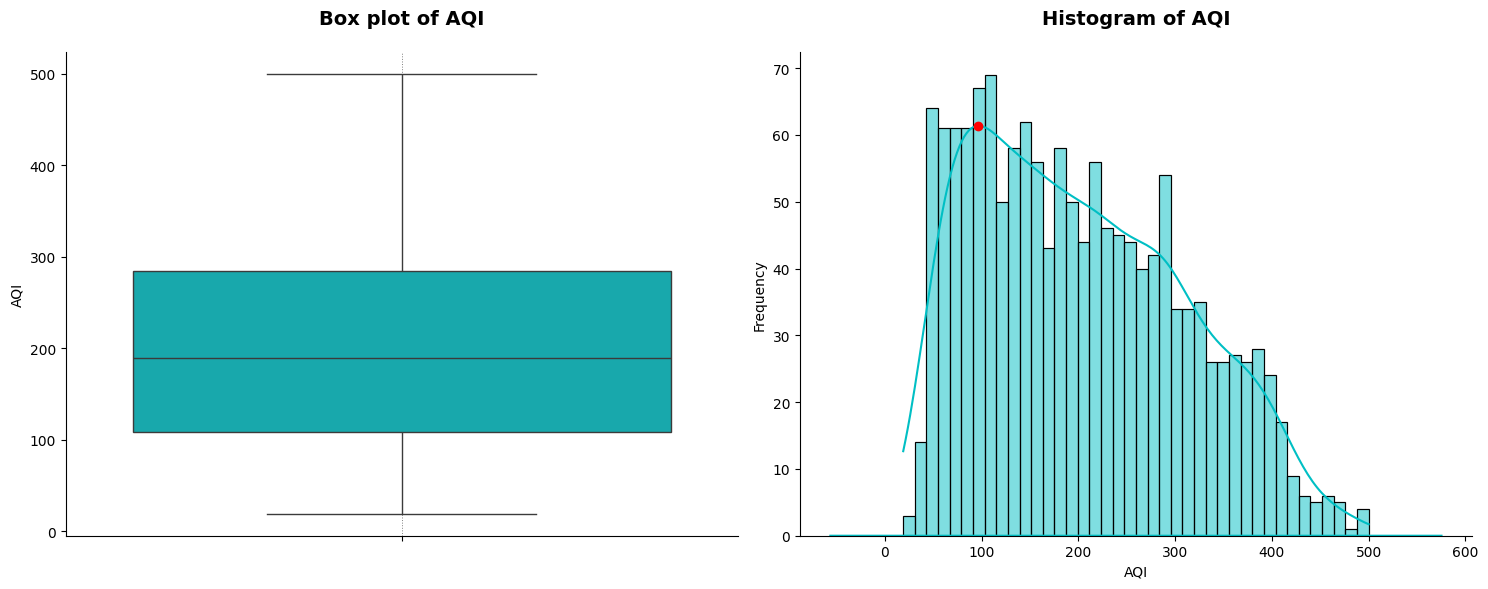

In [37]:
from scipy.signal import find_peaks
fig, ax = plt.subplots(nrows=1, ncols=2, sharey=False, figsize=(15, 6))

sns.boxplot(data=df_air, y = "AQI", ax=ax[0], color="#00BFC4")
ax[0].set_title(f"Box plot of AQI", fontsize=14, pad=20, weight="bold")
ax[0].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
ax[0].set_ylabel("AQI")
sns.despine(ax=ax[0], top=True, right=True, left=False, bottom=False)

sns.histplot(data=df_air, x = "AQI", ax=ax[1], color="#00BFC4", kde=True, bins=40)
ax[1].set_title(f"Histogram of AQI", fontsize=14, pad=20, weight="bold")
ax[1].set_xlabel("AQI")
ax[1].set_ylabel("Frequency")
# ax[1].grid(axis="x", color="gray", linestyle=":", linewidth=0.7)
sns.despine(ax=ax[1], top=True, right=True, left=False, bottom=False)

# Extract KDE values to find peaks
kde = sns.kdeplot(df_air["AQI"], ax=ax[1], color="#00BFC4").lines[0].get_data()
kde_x, kde_y = kde[0], kde[1]
peaks, _ = find_peaks(kde_y)

# Highlight peaks
for peak_idx in peaks:
    plt.plot(kde_x[peak_idx], kde_y[peak_idx], "ro")  # Red dots on peaks

plt.tight_layout()
plt.show()

**General Analysis of the Distribution of `AQI`**

**Box Plot:**

* The distribution shows a **large interquartile range (IQR)**, with the **median around \~190**.
* Values extend from **\~25 to \~500**, with a **concentration between \~110 and \~290**.
* The upper whisker reaches \~500, suggesting the presence of **high-end extreme values**, though not heavily classified as outliers by the boxplot.
* The distribution appears **right-skewed**, but less severely than typical exponential-like variables.

**Histogram:**

* The **histogram confirms a right-skewed distribution**, although the skew is **moderate**:

  * The **majority of AQI values fall between 50 and 300**, with a sharp peak around 90–100.
  * Frequencies **decline gradually beyond 300**, forming a **long right tail**.
* There's a **visible central tendency**, yet **multiple small peaks** suggest the presence of **seasonal or categorical pollution cycles** (e.g., winter smog).

**Summary for Reporting:**

> The `AQI` variable demonstrates a moderately right-skewed distribution. Most daily AQI values fall within the 50–300 range, with a concentration near 100. Although some high values reach up to 500, they are not outliers in the classical sense. The distribution may benefit from normalization or binning if used in sensitive models or classification tasks (e.g., AQI category prediction).

## Numerical Feature Distributions

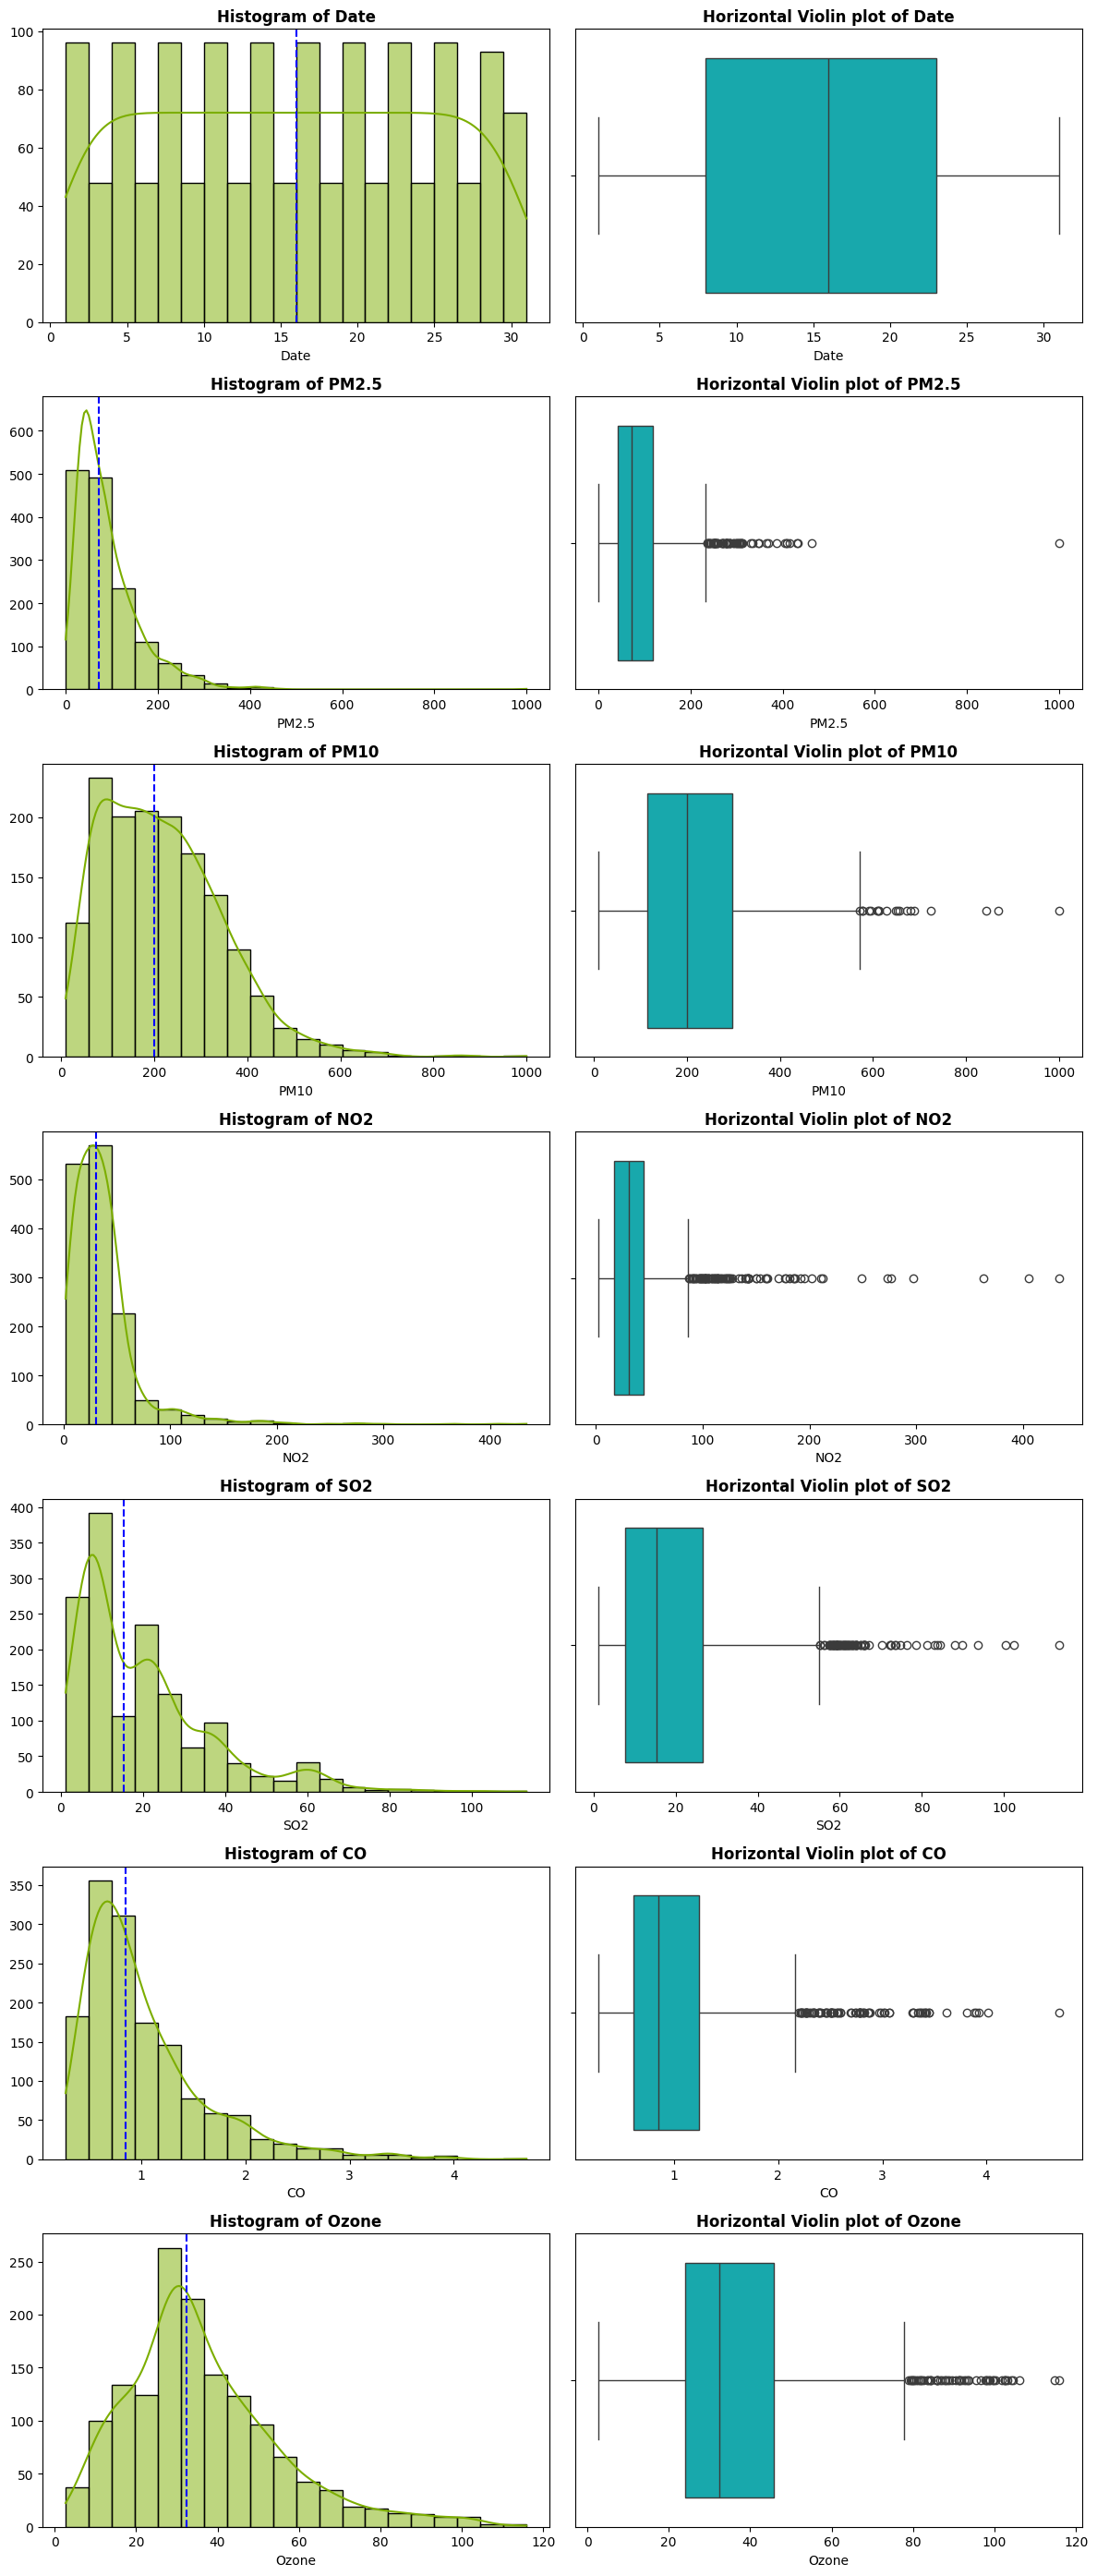

In [36]:
def plot_numerical_features(df=df_air, numerical_features = num_features):
    fig, axes = plt.subplots(len(numerical_features), 2, figsize=(12, len(numerical_features)*4))
    axes = np.atleast_2d(axes)

    for i, feature in enumerate(numerical_features):
        sns.histplot(data=df[feature], color="#7CAE00", bins = 20, kde=True, ax=axes[i, 0])
        axes[i, 0].set_title(f"Histogram of {feature}", weight="bold")
        axes[i, 0].set_ylabel("")
        axes[i, 0].axvline(df[feature].median(), color="blue", linestyle="--", label="Median Train")

        sns.boxplot(data=df[feature], color="#00BFC4", orient="h", ax=axes[i, 1])
        axes[i, 1].set_title(f"Horizontal Violin plot of {feature}", weight="bold")
        axes[i, 1].set_xlabel(feature)

    plt.tight_layout()
    plt.show()

plot_numerical_features()

In [38]:
def check_skewness(data = df_air, numerical_features = num_features, highlight=True, sort=True):
    skewness_dict = {}
    skew_feature = []
    for feature in numerical_features:
        skew = data[feature].skew(skipna=True)
        skewness_dict[feature] = skew

    skew_df = pd.DataFrame.from_dict(skewness_dict, orient="index", columns=["Skewness"])
    if sort:
        skew_df = skew_df.reindex(skew_df["Skewness"].abs().sort_values(ascending=False).index)
    else:
        pass
    
    print(f"\n🔍 Skewness for dataset:")
    print("-"*70)
    print(f"{'Feature':<30} | {'Skewness':<10} | {'Remark'}")
    print("-"*70)
    for feature, row in skew_df.iterrows():
        skew = row["Skewness"]
        abs_skew = abs(skew)
        if abs_skew > 1:
            remark = "Highly skewed"
            color = "\033[91m"  
        elif abs_skew > 0.5:
            remark = "Moderately skewed"
            color = "\033[93m"  
        else:
            remark = "Approximately symmetric"
            color = ""
        endc = "\033[0m" if color else ""
        if highlight and color:
            print(f"{color}{feature:<30} | {skew:>+10f} | {remark}{endc}")
            skew_feature.append(feature)
        else:
            print(f"{feature:<30} | {skew:>+10f} | {remark}")
    print("-"*70)
    return skew_feature, skew_df

skew_feature, skew_df = check_skewness()


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
NO2                            |  +4.353624 | Highly skewed
PM2.5                          |  +2.835526 | Highly skewed
CO                             |  +1.831177 | Highly skewed
SO2                            |  +1.549722 | Highly skewed
Ozone                          |  +1.059949 | Highly skewed
PM10                           |  +0.962042 | Moderately skewed
Date                           |  +0.006766 | Approximately symmetric
----------------------------------------------------------------------


### Insights on Numerical Feature Distributions

**Shape and Spread of Distributions**

- **Histograms** reveal that all features are distributed fairly evenly across their respective ranges.
- **Box plot** confirm that the central 50% of values (the interquartile range), and the whiskers (showing the range).

**Skewness Analysis**

- The **skewness values** for numerical features (`Date`) in dataset are less than 0.5, indicating that the distributions are **approximately symmetric**.

- The features: `NO2`, `PM2.5`, `CO`, `SO2`, `Ozone`, `PM10`  have **skewness values** greater than 0.5, indicating that the distributions are **Highly/Moderately symmetric**. Many model assumes **normal distribution** but in reality data points may not be perfectly symmetric. If the data are skewed, then this kind of model will always underestimate the skewness risk.The more the data is skewed the less accurate the model will be. We need to handle skewness in chapter **Data Preprocessing**

## Correlation Analysis of Numerical Features

1. **What is Correlation?**

**Correlation** measures the **strength and direction of a linear relationship** between two variables.

* The correlation coefficient (usually denoted as **r**) ranges from **-1 to 1**.

2. **Interpretation of Correlation Values**

| Value of r | Relationship Type           | Interpretation                               |
| ---------- | --------------------------- | -------------------------------------------- |
| `r ≈ 1`    | Strong positive correlation | As X increases, Y also increases linearly    |
| `r ≈ -1`   | Strong negative correlation | As X increases, Y decreases linearly         |
| `r ≈ 0`    | No linear correlation       | No clear linear relationship between X and Y |

**Common interpretation of |r|**

![](https://i.ibb.co/TQ3FbQK/correlation.png)

3. **Pearson Correlation Formula**

$$
r = \frac{\sum (x_i - \bar{x})(y_i - \bar{y})}{\sqrt{\sum (x_i - \bar{x})^2 \cdot \sum (y_i - \bar{y})^2}}
$$

* $x_i, y_i$: observed values
* $\bar{x}, \bar{y}$: sample means of X and Y.

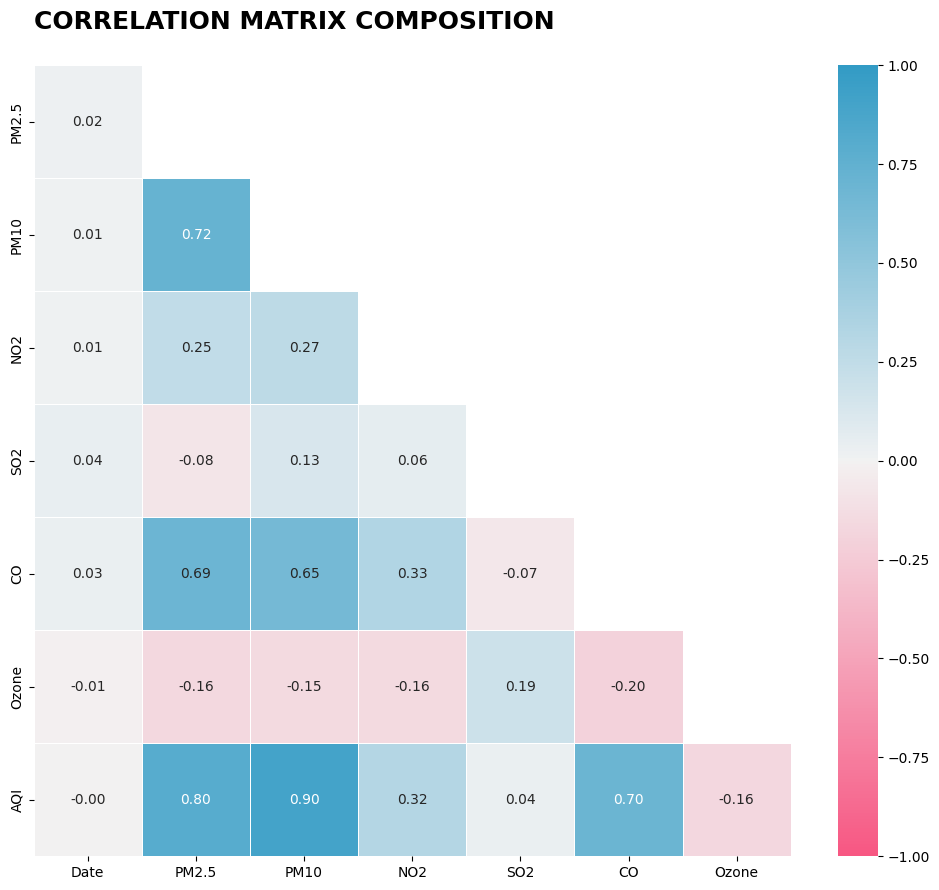

In [41]:
corr_matrix = df_air.drop(columns=cat_features, axis=1).corr(numeric_only=True)
# one_like can build a matrix of boolean(True, False) with the same shape as our data
ones_corr = np.ones_like(corr_matrix, dtype=bool)
mask = np.triu(ones_corr)
adjusted_mask = mask[1:, :-1]
adjusted_cereal_corr = corr_matrix.iloc[1:, :-1]

fig, ax = plt.subplots(figsize = (10, 9))
# That method uses HUSL colors, so you need hue, saturation, and lightness. 
# I used hsluv.org to select the colors of this chart.
cmap = sns.diverging_palette(0, 230, 90, 60, as_cmap=True)

sns.heatmap(data=adjusted_cereal_corr, mask=adjusted_mask,
            annot=True, fmt=".2f", cmap=cmap,
            vmin=-1, vmax=1, linecolor="white", linewidths=0.5)

title = "CORRELATION MATRIX COMPOSITION\n"
ax.set_title(title, loc="left", fontsize=18, weight="bold")

plt.tight_layout()
plt.show()

### **Insights from Correlation Analysis of Numerical Features**

**1. Overall Correlation Pattern**

* Most pollutant variables have **low to moderate correlations** with each other.
* However, AQI shows **strong correlation** with some pollutants, indicating it is heavily influenced by those metrics.

> **Implication**:
>
> * No extreme multicollinearity among predictors, so keeping all features is generally fine.
> * Models like **RandomForest, XGBoost** or **Linear Regression** can still perform well without strong multicollinearity concerns.

**2. Notable Positive Correlations**

| Feature Pair     | Correlation | Interpretation                                                                                          |
| ---------------- | ----------- | ------------------------------------------------------------------------------------------------------- |
| `PM2.5` & `AQI`  | **0.80**    | Fine particulate matter is a major contributor to AQI changes.                                          |
| `PM10` & `AQI`   | **0.90**    | Strongest correlation — coarse particulate matter largely drives AQI variation.                         |
| `CO` & `AQI`     | **0.70**    | High carbon monoxide levels significantly impact AQI.                                                   |
| `PM2.5` & `PM10` | **0.72**    | Fine and coarse particulate matter often rise together, likely from common sources (traffic, industry). |
| `CO` & `PM2.5`   | **0.69**    | CO emissions often coincide with high PM2.5 events.                                                     |
| `CO` & `PM10`    | **0.65**    | CO emissions also align with coarse particulate increases.                                              |

**3. Weak / Negative Correlations**

| Feature Pair               | Correlation       | Interpretation                                                                                                   |
| -------------------------- | ----------------- | ---------------------------------------------------------------------------------------------------------------- |
| `Ozone` & `AQI`            | **-0.16**         | Ground-level ozone does not move in the same direction as AQI; may even be inversely related in some conditions. |
| `SO2` with most pollutants | Very low (≤ 0.13) | Sulphur dioxide levels seem independent from other pollutants in this dataset.                                   |

## Categorical Feature Distributions

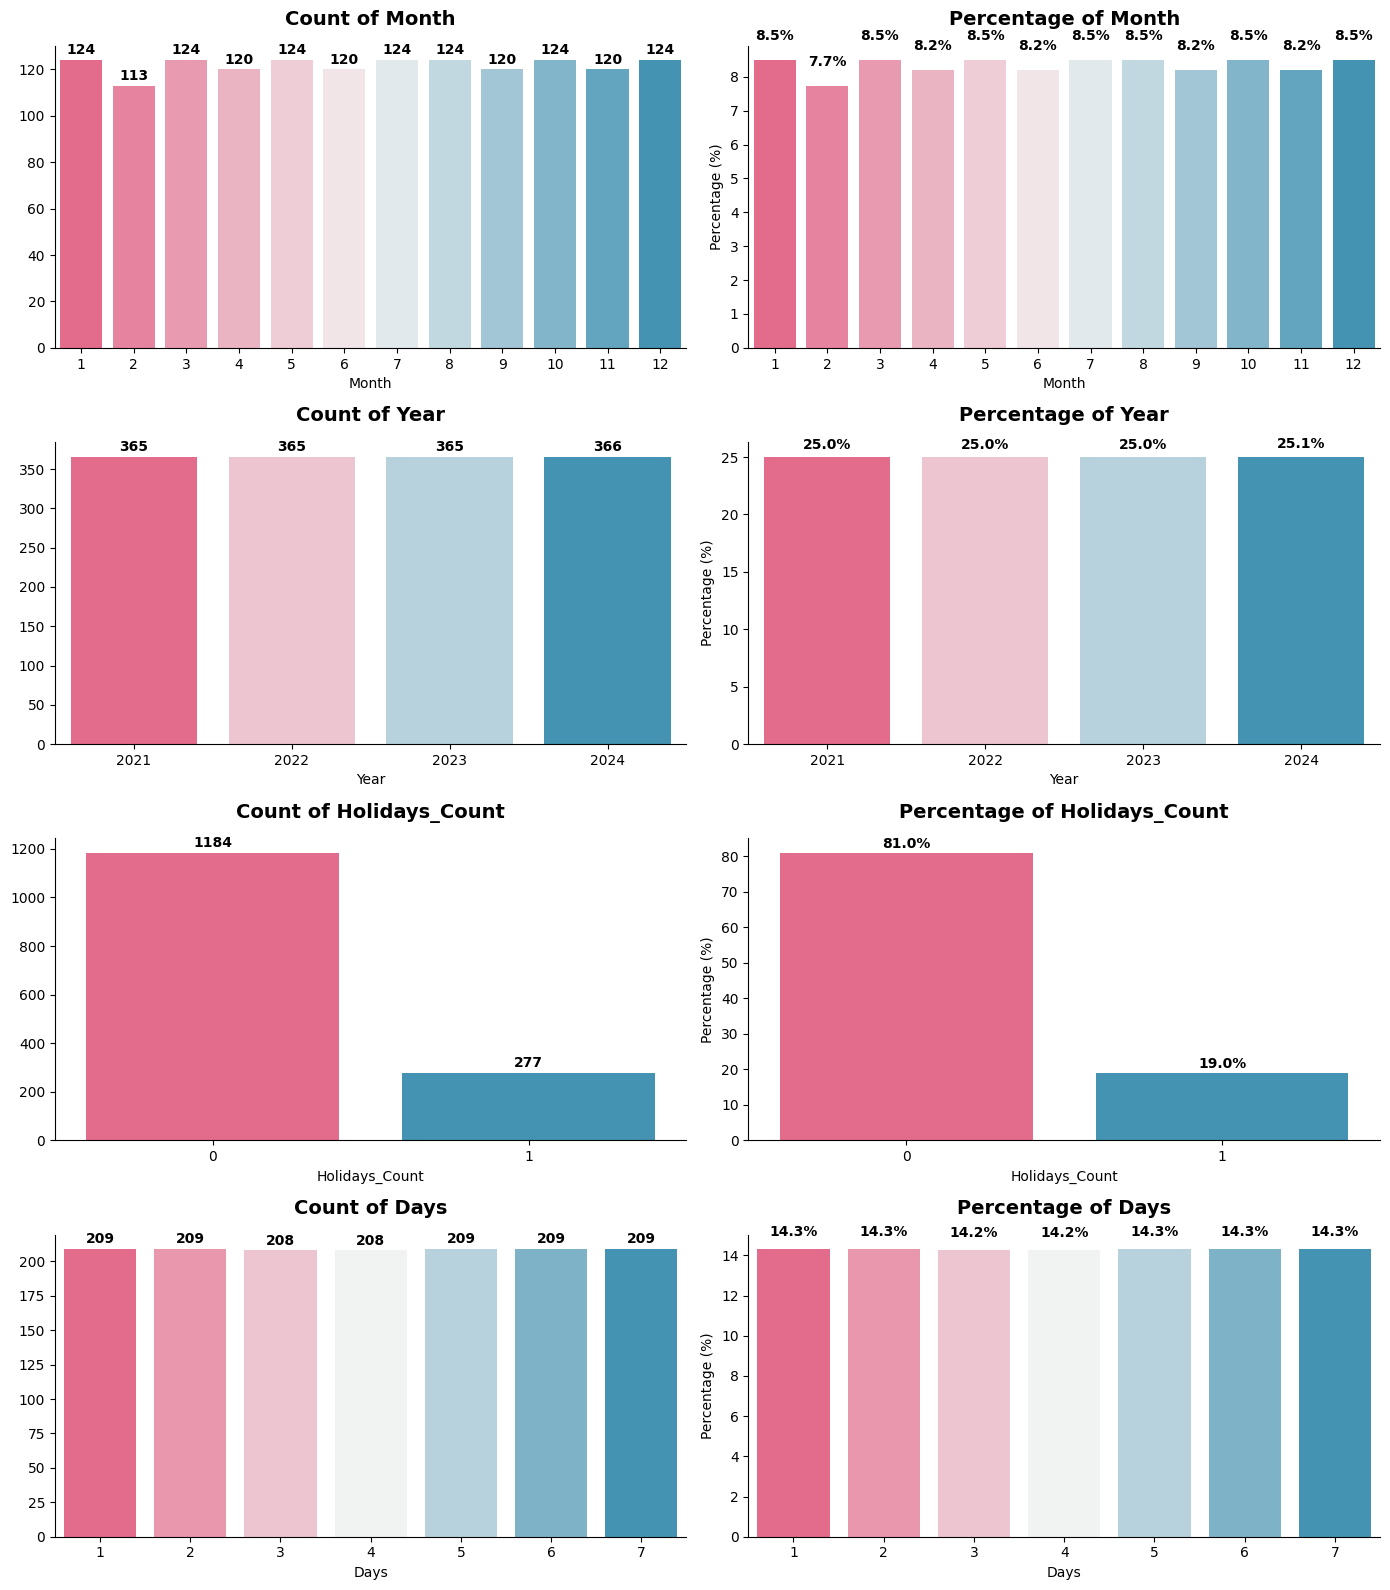

In [42]:
def plot_categorical_distribution(df, cat_features):
    fig, ax = plt.subplots(len(cat_features), 2, figsize=(14, len(cat_features)*4))
    ax = np.atleast_2d(ax)

    for i, feature in enumerate(cat_features):
        # ----------------------------
        # LEFT: Vertical Countplot
        # ----------------------------
        sns.countplot(data=df, x=feature, ax=ax[i, 0],
                      palette=color(n_colors=len(df[feature].unique())))
        
        ax[i, 0].set_title(f"Count of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 0].set_xlabel(feature)
        if feature == "Education_Level":
            ax[i, 0].set_xticklabels(labels = ax[i, 0].get_xticklabels(), rotation = 45)
        ax[i, 0].set_ylabel("")
        sns.despine(ax=ax[i, 0], top=True, right=True)

        # Add count labels on top
        for p in ax[i, 0].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i, 0].text(x, height + max(df[feature].value_counts()) * 0.01,
                          f"{int(height)}",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

        # ----------------------------
        # RIGHT: Barplot with % labels
        # ----------------------------
        feature_counts = df[feature].value_counts(normalize=True).sort_index()
        percentage_df = feature_counts.mul(100).round(2).reset_index()
        percentage_df.columns = [feature, "Percentage"]

        sns.barplot(data=percentage_df, x=feature, y="Percentage",
                    ax=ax[i, 1],
                    palette=color(n_colors=len(feature_counts)))
        
        ax[i, 1].set_title(f"Percentage of {feature}", fontsize=14, pad=15, weight="bold")
        ax[i, 1].set_ylabel("Percentage (%)")
        if feature == "Education_Level":
            ax[i, 1].set_xticklabels(labels = ax[i, 1].get_xticklabels(), rotation = 45)
        ax[i, 1].set_xlabel(feature)
        sns.despine(ax=ax[i, 1], top=True, right=True)

        # Add % labels on top
        for p in ax[i, 1].patches:
            height = p.get_height()
            x = p.get_x() + p.get_width() / 2
            ax[i, 1].text(x, height + 0.5,
                          f"{height:.1f}%",
                          ha="center", va="bottom", fontsize=10, fontweight="bold")

    plt.tight_layout()
    plt.show()

plot_categorical_distribution(df=df_air, cat_features=cat_features)

### Insight on categorical Feature Distribution

**Overview Analysis of Categorical-like Numerical Features**

**1. Month**

* Distribution is **almost uniform** (each month accounts for \~8.2%–8.5%), except for February at \~7.7% due to fewer days.
* No significant imbalance detected.

**2. Year**

* Data spans from **2021–2024**, with each year contributing around **25%** of observations → balanced distribution by year.

**3. Holidays\_Count**

* **81%** of days are non-holidays, only **19%** are holidays → this variable is **highly imbalanced**.
* Could be transformed into a binary feature (`Has_Holiday`) for simpler processing.

**4. Days**

* Days of the week (1–7) are **almost evenly distributed** (\~14.2%–14.3% each).
* No bias toward specific days.

## Bivariate Analysis

,Month,Count,Mean_target_feature,Median_target_feature,Std_target_feature
10,11,120,342.133333,356.500000,72.200809
0,1,124,305.685484,313.500000,88.153263
11,12,124,297.266129,295.000000,84.750433
1,2,113,239.734513,234.000000,83.424048
3,4,120,222.350000,222.000000,70.799949
2,3,124,200.129032,192.500000,55.926777
4,5,124,199.717742,201.000000,77.775951
9,10,124,191.637097,175.000000,90.139128
5,6,120,163.983333,156.000000,68.597717
6,7,124,90.354839,81.500000,42.786707


🔎 D’Agostino and Pearson Normality Test for 'AQI' across 'Month' groups

 Group: 1 (n = 124)
  Statistic : 2.550
  p-value   : 0.27950
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: 2 (n = 113)
  Statistic : 21.340
  p-value   : 0.00002
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 3 (n = 124)
  Statistic : 4.976
  p-value   : 0.08309
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: 4 (n = 120)
  Statistic : 3.859
  p-value   : 0.14525
  🟢 Interpretation: Data appears to follow a normal distribution.

 Group: 5 (n = 124)
  Statistic : 10.912
  p-value   : 0.00427
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 6 (n = 120)
  Statistic : 8.767
  p-value   : 0.01248
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 7 (n = 124)
  Statistic : 82.389
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal dist

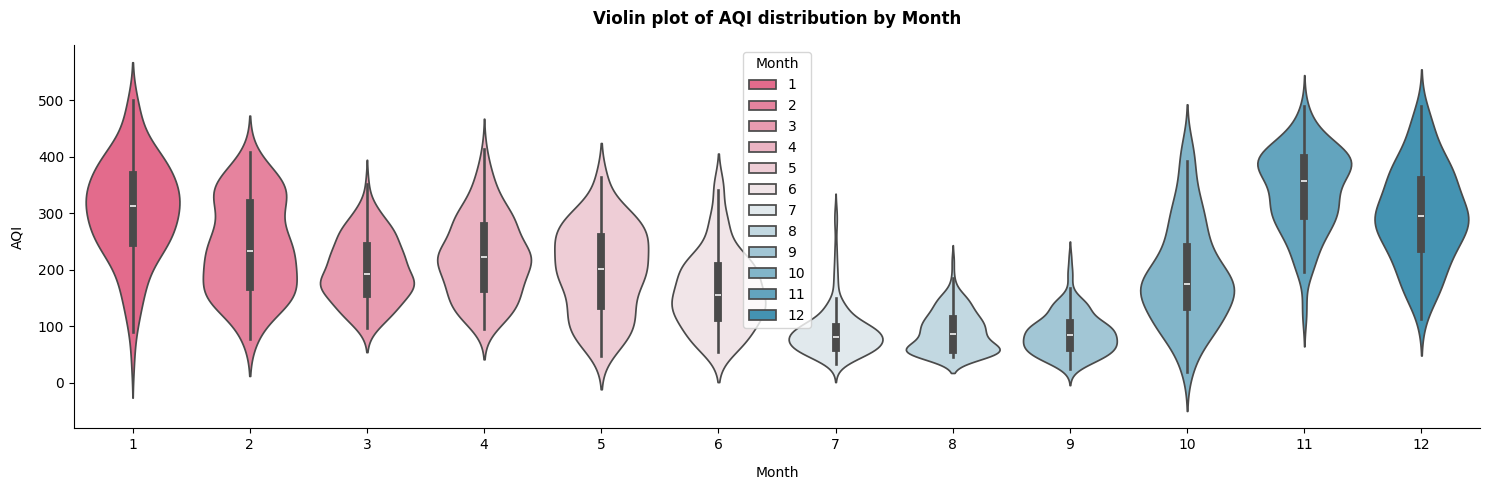

,Year,Count,Mean_target_feature,Median_target_feature,Std_target_feature
0,2021,365,215.813699,196.000000,121.638486
1,2022,365,208.536986,214.000000,105.757689
3,2024,366,195.450820,180.500000,99.339884
2,2023,365,189.060274,165.000000,101.443682


🔎 D’Agostino and Pearson Normality Test for 'AQI' across 'Year' groups

 Group: 2021 (n = 365)
  Statistic : 139.276
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2022 (n = 365)
  Statistic : 48.246
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2023 (n = 365)
  Statistic : 28.777
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2024 (n = 366)
  Statistic : 18.770
  p-value   : 0.00008
  🔴 Interpretation: Data does not appear to follow a normal distribution.


🔍 Kruskal-Wallis Test: AQI ~ Year
Kruskal-Wallis H-statistic: 10.459
p-value: 0.015038999188123386
🟢 Significant difference found. Running Dunn's Post-Hoc Test...
          2021      2022      2023      2024
2021  1.000000  1.000000  0.031777  0.398873
2022  1.000000  1.000000  0.070632  0.704857
2023  0.031777  0.070632  1.000000  1.000000
2024  0.398873  0.7

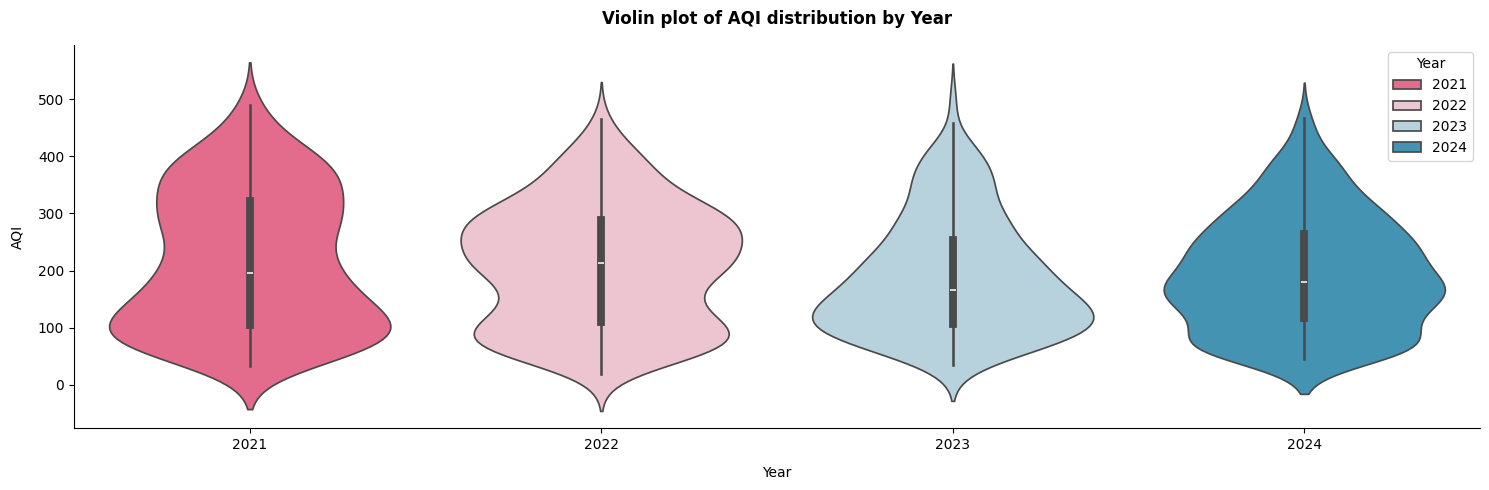

,Holidays_Count,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,1,277,202.310469,187.000000,107.167269
0,0,1184,202.187500,189.000000,107.993888


🔎 D’Agostino and Pearson Normality Test for 'AQI' across 'Holidays_Count' groups

 Group: 0 (n = 1184)
  Statistic : 121.639
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 277)
  Statistic : 18.696
  p-value   : 0.00009
  🔴 Interpretation: Data does not appear to follow a normal distribution.

🔍 Mann–Whitney U Test for 'AQI' by 'Holidays_Count'

H₀: The distributions of the two groups are equal.
H₁: The distributions are different.

U statistic : 163510.0
p-value     : 0.9402884783912789

⚪ Result: No statistically significant difference between the two groups (Fail to reject H₀).


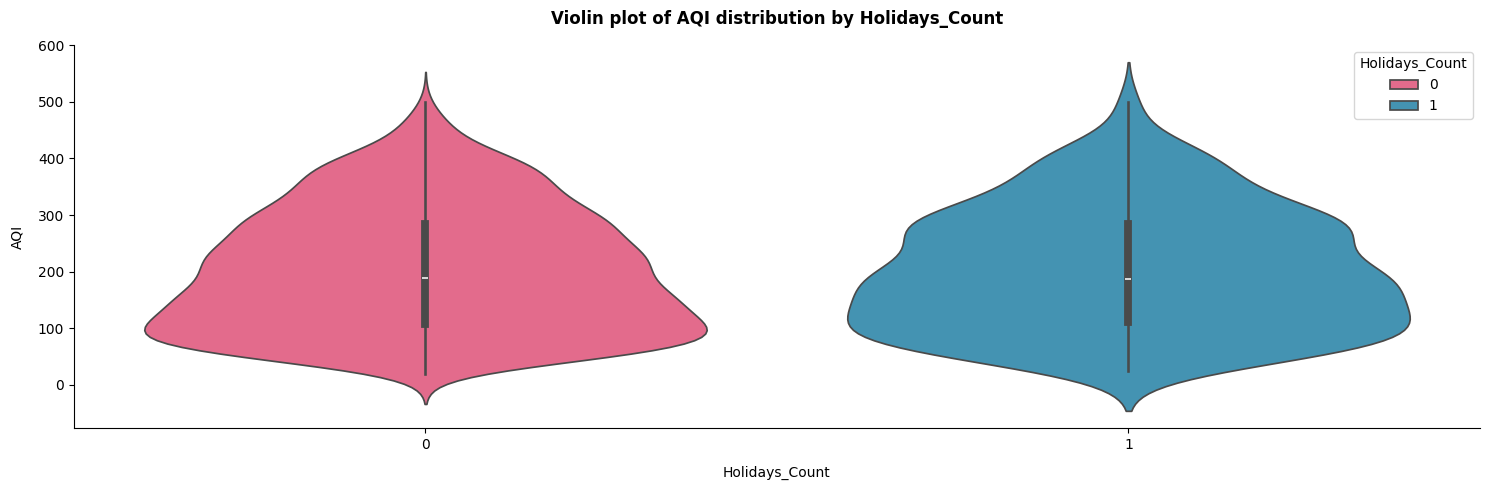

,Days,Count,Mean_target_feature,Median_target_feature,Std_target_feature
1,2,209,204.440191,201.000000,106.375412
4,5,209,203.870813,185.000000,112.668154
2,3,208,203.504808,188.500000,105.783481
3,4,208,203.250000,180.500000,110.165554
6,7,209,201.665072,193.000000,105.312642
5,6,209,200.593301,189.000000,109.263057
0,1,209,198.162679,184.000000,106.243200


🔎 D’Agostino and Pearson Normality Test for 'AQI' across 'Days' groups

 Group: 5 (n = 209)
  Statistic : 16.071
  p-value   : 0.00032
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 6 (n = 209)
  Statistic : 15.492
  p-value   : 0.00043
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 7 (n = 209)
  Statistic : 10.713
  p-value   : 0.00472
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 1 (n = 209)
  Statistic : 27.821
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 2 (n = 209)
  Statistic : 22.342
  p-value   : 0.00001
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 3 (n = 208)
  Statistic : 42.455
  p-value   : 0.00000
  🔴 Interpretation: Data does not appear to follow a normal distribution.

 Group: 4 (n = 208)
  Statistic : 19.385
  p-value   : 0.00006
  🔴 Interpretation: Data does not app

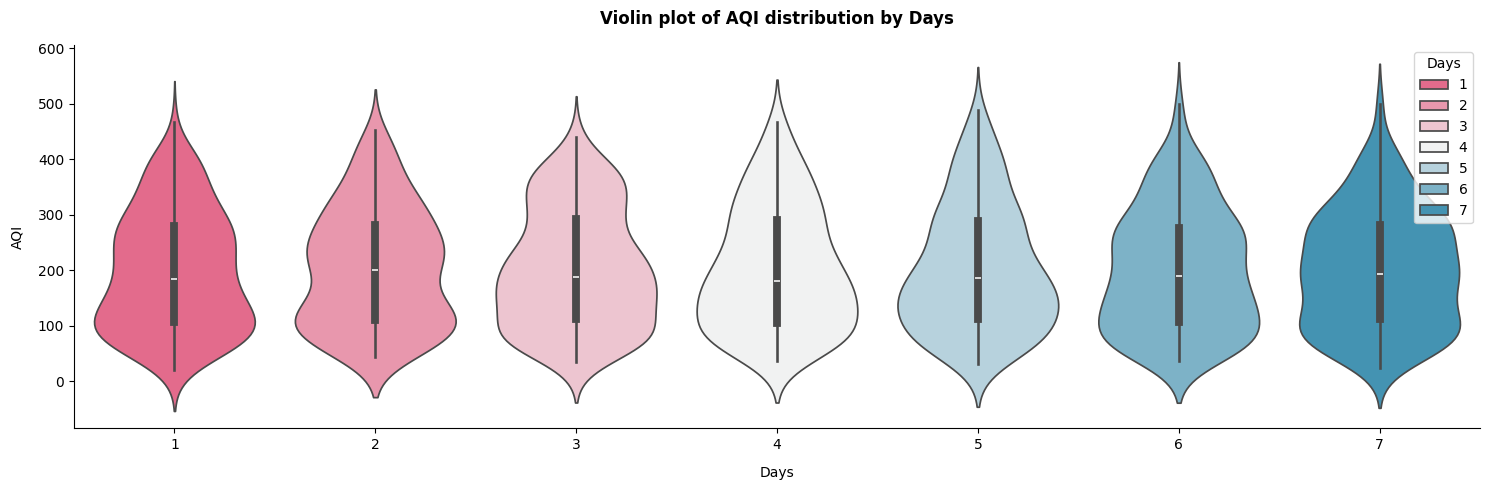

In [44]:
from IPython.core.display import HTML
target_feature = "AQI"
def perform_statical_testing(total_categories, feature, df_train = df_air, target_feature = target_feature):
    cal_normaltest(cat_feature=feature, num_feature=target_feature, df=df_train)
    if total_categories == 2:
        cal_mannwhitneyu(dataframe=df_train, categorical_feature=feature, num_feature=target_feature)
    else:
        perform_kruskal_test(df=df_train, categorical_feature=feature, numeric_feature=target_feature)

def plot_categorical_distribution_by_target_feature(feature, df_train = df_air, target_feature = target_feature, order = None):
    """
    Performs statical testing for each groups (distribution by target_feature) by ANOVA, T-test, Mann-Whitney U test,... <br>
    Draw violin and histogram to display the distribution for each groups of feature.
    Parameters:
        feature (str): The name of the column representing the grouping variable (categorical).
        df_train (pd.DataFrame): The input dataset.
        target_feature (str): The name of the column representing the target feature.
        order (list): Order items in plot.

    Returns:
        None
    """

    # Summary information
    df_summary_feature = df_train.groupby(by = feature, as_index= False)\
    .agg (
        Count = (target_feature, "count"),
        Mean_target_feature = (target_feature, "mean"),
        Median_target_feature = (target_feature, "median"),
        Std_target_feature = (target_feature, "std")
    )
    df_summary_feature = df_summary_feature.sort_values(by="Mean_target_feature", ascending=False)    

    summary_data = [
        ("Total Categories", f"{df_summary_feature.shape[0]}"),
        ("Overall Target Mean", f"{df_train[target_feature].mean():.2f}")
    ]
    summary_html = "<ul>" + "".join([f"<li><b>{k}:</b> {v}</li>" for k, v in summary_data]) + "</ul>"
    display(HTML(summary_html))
    display(df_summary_feature.style.background_gradient(cmap=cmap).set_table_attributes('style="width:75%; margin:auto;"'))

    perform_statical_testing(total_categories=df_summary_feature.shape[0], 
                             feature=feature, df_train=df_train, target_feature=target_feature)

    # Plot distribution
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.violinplot(x=feature, y=target_feature, data=df_train, hue=feature, 
                palette=color(n_colors=df_train[feature].nunique()), ax=ax)
    ax.set_title(f"Violin plot of {target_feature} distribution by {feature}", pad=15, weight = "bold")
    ax.set_xlabel(feature, labelpad=10)
    ax.set_ylabel(target_feature, labelpad=10)
    # plt.grid(axis="y", color="gray", linestyle=":", alpha=0.7)
    sns.despine(left=False, bottom=False, ax=ax)

    plt.tight_layout()
    plt.show()

for feature in cat_features:
    display(HTML(f"<h2 style='text-align:center; font-size:22px; color:blue;'><b>Distribution of {target_feature} by {feature}</b></h2>"))
    plot_categorical_distribution_by_target_feature(feature=feature)

### Insight for Categorical Features by Premium_Amount

`Month`

1. **Winter is the “pollution hotspot”**

   * The highest average AQI occurs in **November, December, and January**, all exceeding the “Very Poor” threshold under CPCB standards.
   * Likely causes: **temperature inversion** trapping fine particles, **crop residue burning**, and increased **heating demand**.

2. **Monsoon season significantly improves air quality**

   * June–September have the lowest AQI levels (below 100), thanks to **rainfall washing away fine particles** and reduced outdoor industrial activity.

3. **High AQI variability during peak pollution months**

   * AQI standard deviation is largest in November–January → air pollution levels fluctuate widely, with some days reaching extreme AQI (> 400).

4. **Seasonal differences are statistically significant**

   * Kruskal-Wallis and Dunn’s Post-Hoc results confirm that **AQI varies significantly by season**.
   * The gap between **winter** and **monsoon** months is the most pronounced.

`Year`

1. **General Trend**

   * The average AQI shows a gradual decline over the years:
     **2021 (215.81) → 2022 (208.53) → 2024 (195.45) → 2023 (189.06)**.
     This indicates a **slight improvement in air quality** over time.
   * However, **2022** recorded a higher median AQI (214) compared to 2021 (196), suggesting that despite the average decrease, there were still periods of severe pollution.

2. **AQI Variability**

   * The highest standard deviation is observed in **2021 (121.64)** → greater fluctuation in pollution levels.
   * 2024 and 2023 show lower standard deviations → more stable AQI levels.

3. **Data Distribution**

   * **D’Agostino & Pearson test**: All four years **do not follow a normal distribution**.
   * **Kruskal–Wallis test**: p-value ≈ 0.015 → **statistically significant differences in AQI between years**.
   * **Dunn’s Post-Hoc**: The most notable difference is between **2021 and 2023** (p ≈ 0.0318) → indicating a clear improvement from 2021 to 2023.

`Holidays_Count`

* **Holidays do not appear to be a significant factor affecting AQI** in this dataset.

`Days`

1. **Descriptive Statistics Overview**

   * The **mean AQI** across days ranges narrowly from \~198 to \~204, with the overall mean at **202.21**.
   * The **median AQI** values are also close (ranging from 180.5 to 201), indicating no extreme shifts between days.
   * **Standard deviations** (\~105–113) are similar across all days, suggesting consistent variability throughout the week.

2. **Distribution Shape (Violin Plots)**

   * The AQI distributions are visually similar across days, with comparable spread and median positioning.
   * All days display a wide range, including occasional high outliers exceeding 500.

3. **Normality Test (D’Agostino & Pearson)**

   * **All day groups** show p-values < 0.05 → reject normality assumption.
   * This confirms AQI does not follow a normal distribution for any day of the week.

4. **Kruskal–Wallis Test Results**

   * H-statistic = 0.541, p-value ≈ 0.997 → **no statistically significant difference** in AQI distributions between days.
   * This implies **day-of-week is not a strong factor** influencing AQI levels.

**Conclusion:**

> AQI levels remain relatively stable across the week, with no statistically significant differences in distribution or central tendency. Day-of-week is unlikely to be a useful predictor in modeling AQI variations.

**SUMMARY TABLE**

| Feature / Analysis Area  | Key Insights                                                                                                                                                                                                                                                                                                                                                                 | Statistical Significance                                                          | Practical Implication                                                                            |
| ------------------------ | ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | --------------------------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| **Month**                | - Distribution is almost uniform (\~8.2–8.5%), except for February (\~7.7%).<br>- Winter months (Nov–Jan) have the highest AQI, exceeding the “Very Poor” threshold under CPCB standards.<br>- Monsoon months (Jun–Sep) have the lowest AQI (< 100).<br>- AQI variability is highest in winter.<br>- Clear seasonal differences in AQI.                                      | Kruskal–Wallis & Dunn’s Post-Hoc: p < 0.05.                                     | Seasonality is important → include in predictive models.                                         |
| **Year**                 | - Slight decreasing trend in AQI: 2021 (215.81) → 2023 (189.06).<br>- 2022 median higher than 2021.<br>- 2021 shows the largest variability (std = 121.64).                                                                                                                                                                                                                  | Kruskal–Wallis: p ≈ 0.015.<br>Dunn’s: clear difference between 2021 and 2023. | Reflects gradual improvement in air quality over time.                                           |
| **Holidays\_Count**      | - 81% non-holiday, 19% holiday.<br>- No clear difference in AQI between holidays and non-holidays.                                                                                                                                                                                                                                                                           | Mann–Whitney U: p ≈ 0.94.                                                       | Low predictive value for AQI, can be dropped or converted to binary.                             |
| **Days (Day-of-Week)**   | - Mean AQI varies narrowly (\~198–204).<br>- Median AQI is similar (\~180.5–201).<br>- Standard deviations (\~105–113) are consistent.<br>- Distributions are similar across days.                                                                                                                                                                                           | Kruskal–Wallis: p ≈ 0.997.                                                      | Not a significant factor in AQI prediction.                                                      |
| **Correlation Analysis** | - **Strongest:** `PM10` (**0.90**), `PM2.5` (**0.80**), `CO` (**0.70**).<br>- **Moderate:** `NO2` (**0.32**) has some impact but less than particulate matter.<br>- **Weak/Negative:** `Ozone` (-0.16), `SO2` (0.04) are almost unrelated.<br>- `PM2.5` & `PM10` (**0.72**) often rise together from common sources.<br>- `CO` correlates with PM2.5 (0.69) and PM10 (0.65). | No significance testing applied here (correlation analysis).                      | No severe multicollinearity → keep all features, suitable for both tree-based and linear models. |


## Multivariate Analysis (Let’s address some questions)

In [45]:
df_air_ma = df_air.copy()

### How does AQI vary between different seasons of the year? (Winter, Monsoon, Dry season)

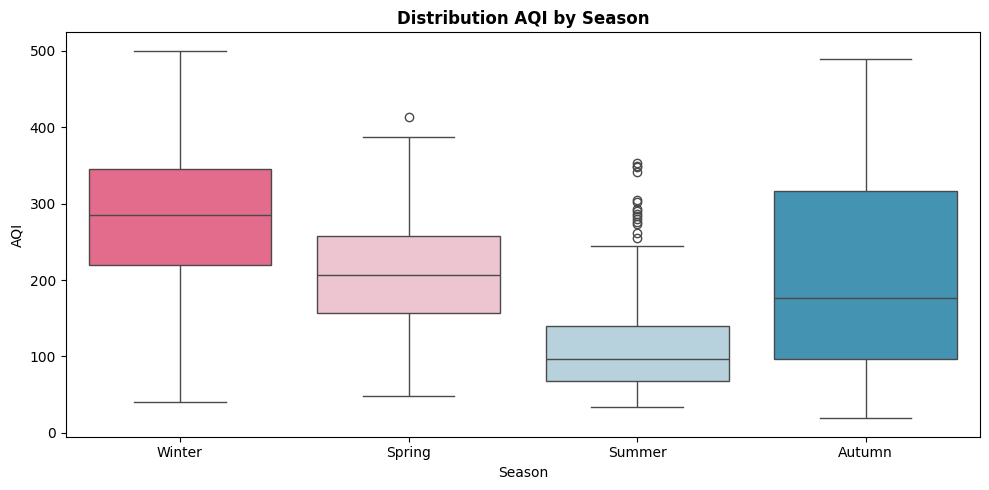

In [46]:
def label_season(row):
    if row["Month"] in [3, 4, 5]:
        return "Spring"
    elif row["Month"] in [6, 7, 8]:
        return "Summer"
    elif row["Month"] in [9, 10, 11]:
        return "Autumn"
    else:
        return "Winter"
df_air_ma["Season"] = df_air_ma.apply(label_season, axis=1)

plt.figure(figsize=(10, 5))
sns.boxplot(data=df_air_ma, x="Season", y="AQI", palette=color(n_colors=4))
plt.title("Distribution AQI by Season", weight="bold")
plt.xlabel("Season")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()

**Answer**

* **Winter** → Highest AQI, severe pollution.
* **Summer/Monsoon** → Lowest AQI, noticeably cleaner air.
* **Spring and Autumn** → Intermediate AQI, but autumn shows more frequent extreme pollution spikes.

### Which month has the highest and lowest average AQI?

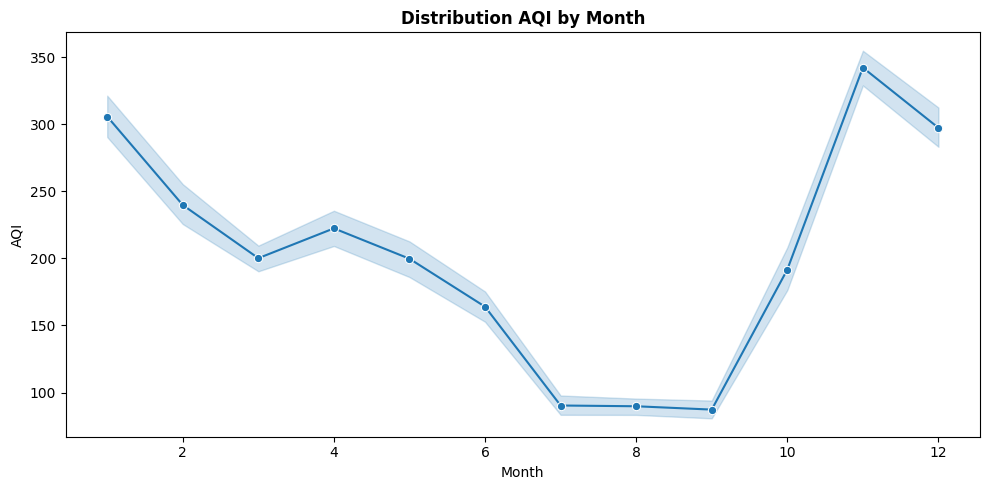

In [53]:
plt.figure(figsize=(10, 5))
sns.lineplot(data=df_air_ma, x="Month", y="AQI", marker="o")
plt.title("Distribution AQI by Month", weight="bold")
plt.xlabel("Month")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()

**Answer**

* **Summer and early autumn months (June–September)** → AQI drops sharply, reaching its lowest levels of the year (often below 100). This aligns with the **monsoon season**, where rainfall effectively washes away airborne particles and improves air quality.

* **Late autumn and winter months (October–December)** → AQI rises dramatically, peaking in November and December at **over 300**. Likely reasons include:

  * **Temperature inversion** trapping pollutants close to the ground.
  * **Crop residue burning** in nearby agricultural areas.
  * Increased emissions from heating activities.

**Conclusion**: The AQI trend confirms a **seasonal cycle**, with the cleanest air in the rainy summer months and the most polluted air in late autumn and winter.

### Is there a clear improvement or deterioration trend in AQI from 2021–2024?

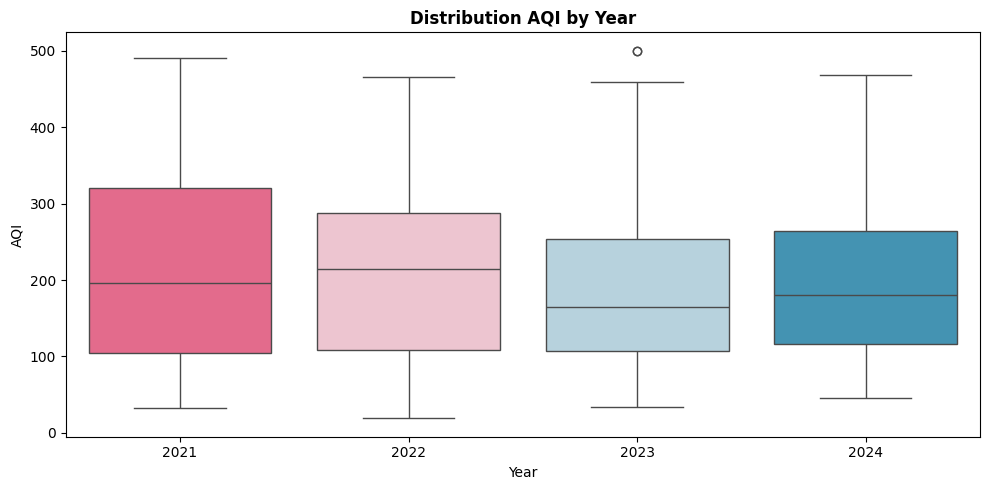

In [49]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df_air_ma, x="Year", y="AQI", palette=color(n_colors=4))
plt.title("Distribution AQI by Year", weight="bold")
plt.xlabel("Year")
plt.ylabel("AQI")
plt.tight_layout()
plt.show()

**Answer**

* **2021 → 2023**: AQI shows a downward trend in both **median** and spread (IQR), indicating **an improvement in air quality** during this period.
* **2024**: The median AQI slightly increases compared to 2023, and the upper range becomes wider, suggesting **a rebound in pollution levels**, especially in higher AQI values.

### Is there a significant difference in AQI between holidays and regular days?

**Answer**

Base on **Distribution of AQI by Holidays_Count**, **Mann–Whitney U test**: p ≈ **0.94** → no statistically significant difference between the two groups.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Data Preprocessing</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Data Preprocessing
    </h1>
</div>


## Handling Skewness

In [58]:
num_features = ["Date", "PM2.5", "PM10", "NO2", "SO2", "CO", "Ozone", "AQI"]
skew_feature, skew_df = check_skewness(data=df_air, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
NO2                            |  +4.353624 | Highly skewed
PM2.5                          |  +2.835526 | Highly skewed
CO                             |  +1.831177 | Highly skewed
SO2                            |  +1.549722 | Highly skewed
Ozone                          |  +1.059949 | Highly skewed
PM10                           |  +0.962042 | Moderately skewed
AQI                            |  +0.424019 | Approximately symmetric
Date                           |  +0.006766 | Approximately symmetric
----------------------------------------------------------------------


In [57]:
from sklearn.preprocessing import PowerTransformer

def handle_skewed_features(
    df,
    zero_threshold=0.9,
    skew_threshold=0.5,
    num_features=None,
    exclude_cols=None,
    dataset="Train data"
    
):
    """
    Handle skewed numerical features by applying appropriate transformations,
    *forcing* certain columns to be transformed even if they don't exceed skew_threshold.

    Parameters:
    - df: pandas.DataFrame
    - zero_threshold: float (default=0.9)
    - skew_threshold: float (default=0.5)
    - num_features: list of numerical columns to consider
    - exclude_cols: list of columns to skip entirely
    - dataset: Name of dataset

    Returns:
    - df: transformed DataFrame
    - transformed_cols: list of new feature names
    - high_zero_cols: list of sparse features (> zero_threshold)
    - skewed_cols: list of auto‑detected skewed features
    - pt_dict: dict mapping each YJ‑transformed col → its PowerTransformer
    """
    df = df.copy()
    if num_features is None:
        raise ValueError("`num_features` must be provided")
    if exclude_cols is None:
        exclude_cols = []


    # 1) pick the numeric cols to scan
    numerical_cols = [c for c in num_features if c not in exclude_cols]

    # 2) detect ultra‑sparse
    zero_ratios = (df[numerical_cols] == 0).sum() / len(df)
    high_zero_cols = zero_ratios[zero_ratios > zero_threshold].index.tolist()

    # 3) compute skew
    skew_vals = df[numerical_cols].apply(lambda s: skew(s.dropna()))
    auto_skewed = skew_vals[abs(skew_vals) > skew_threshold].index.tolist()

    # 4) union these with your forced list
    to_transform = list(set(auto_skewed))

    transformed_cols = []
    dropped_cols     = []
    pt_dict          = {}

    for col in to_transform:
        # if it's sparse → binary+log
        if col in high_zero_cols:
            df[f"Has_{col}"] = (df[col] > 0).astype(int)
            df[f"Log_{col}"] = df[col].map(lambda x: np.log1p(x) if x > 0 else 0)
            transformed_cols += [f"Has_{col}", f"Log_{col}"]
            dropped_cols.append(col)
        # if it's discrete small‑cardinality, skip transform but keep
        elif df[col].nunique() <= 5:
            # do nothing (we still keep raw col in df)
            continue
        # otherwise apply Yeo‑Johnson
        else:
            pt = PowerTransformer(method="yeo-johnson")
            arr = df[[col]].values  # shape (n,1)
            df[f"PT_{col}"] = pt.fit_transform(arr)
            pt_dict[col] = pt
            transformed_cols.append(f"PT_{col}")
            dropped_cols.append(col)

    # drop originals for any column we did transform
    df.drop(columns=dropped_cols, inplace=True)

    return df, transformed_cols, high_zero_cols, auto_skewed, pt_dict

In [59]:
processed_df, transformed_columns, sparse_columns, skewed_columns, pt_dict_train = handle_skewed_features(df=df_air, num_features=skew_feature)
num_features = ["Date", "PT_PM2.5", "PT_PM10", "PT_NO2", "PT_SO2", "PT_CO", "PT_Ozone", "AQI"]
skew_feature, skew_df = check_skewness(data=processed_df, numerical_features=num_features)


🔍 Skewness for dataset:
----------------------------------------------------------------------
Feature                        | Skewness   | Remark
----------------------------------------------------------------------
AQI                            |  +0.424019 | Approximately symmetric
PT_CO                          |  +0.108703 | Approximately symmetric
PT_PM10                        |  -0.044903 | Approximately symmetric
PT_PM2.5                       |  +0.011226 | Approximately symmetric
PT_NO2                         |  +0.008115 | Approximately symmetric
Date                           |  +0.006766 | Approximately symmetric
PT_Ozone                       |  +0.002584 | Approximately symmetric
PT_SO2                         |  +0.001858 | Approximately symmetric
----------------------------------------------------------------------


**Observations from the Skewness Table (`processed_df`):**

**Approximately Symmetric**:

* Several features, such as:

  * `PT_CO`, `PT_PM10`, `PT_PM2.5`, `PT_NO2`, `PT_Ozone` and `PT_SO2` less than 0.5.
  * This indicates that **Yeo-Johnson transformation was effective** for these features.

## Re-checking Outliers

In [65]:
checking_outlier(list_feature=num_features, df=processed_df, dataset_name="Data")

🔍 Data Checking outlier


,Feature,Outlier Count
0,PT_PM2.5,4
1,PT_PM10,3
2,PT_NO2,26
3,PT_Ozone,33


## Create Test Set

🔴 Suppose you chatted with experts who told you that the **PT_PM10** is a very important attribute to predict **AQI**. <br>
🔴 We may want to ensure that the test set is representative of the various categories of total **PT_PM10** in the whole dataset. Since the **PT_PM10** is a continuous numerical attribute, we first need to create category attribute.

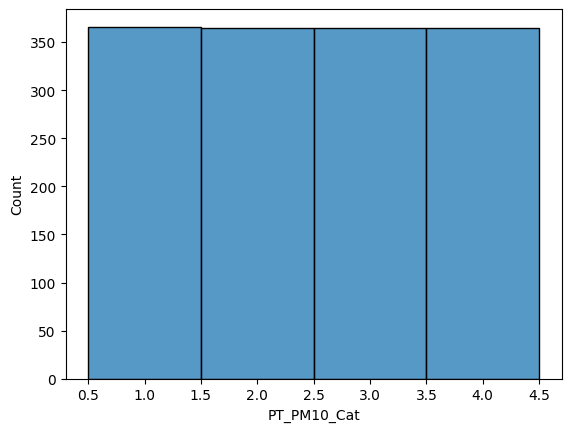

In [60]:
processed_df["PT_PM10_Cat"] = pd.qcut(processed_df["PT_PM10"],
                                              q=4,
                                              labels=[1, 2, 3, 4])

sns.histplot(data=processed_df["PT_PM10_Cat"]);

In [61]:
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(processed_df, processed_df["PT_PM10_Cat"]):
    start_train_set = processed_df.iloc[train_index]
    start_test_set = processed_df.iloc[test_index]

In [62]:
# Now we should remove the PT_PM10_Cat attribute so the data is back to its original state:
for set_ in (start_train_set, start_test_set): 
    set_.drop("PT_PM10_Cat", axis=1, inplace=True)

## Scale and Encode

In [68]:
df_air_new = start_train_set.drop("AQI", axis=1)
df_air_label = start_train_set["AQI"].copy()

list_feature_num_robust = ["PT_PM2.5","PT_PM10", "PT_NO2",  "PT_Ozone"]
list_feature_num_stand = ["Date", "PT_SO2", "PT_CO"]
list_feature_cat_onehot = ["Month", "Year", "Holidays_Count", "Days"]

In [69]:
# There are no **missing values** in dataset. But we will still handle missing values ​​to check the data in the future.
num_robust_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", RobustScaler())
])

num_stand_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_onehot_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore")) # Handling Text and Categorical Attributes
])

preprocessor = ColumnTransformer(transformers=[
    ("num_robust", num_robust_transformer, list_feature_num_robust),
    ("num_standard", num_stand_transformer, list_feature_num_stand),
    ("cat_onehot", cat_onehot_transformer, list_feature_cat_onehot)
])

preprocessor.fit(df_air_new)

ColumnTransformer(transformers=[('num_robust',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', RobustScaler())]),
                                 ['PT_PM2.5', 'PT_PM10', 'PT_NO2', 'PT_Ozone']),
                                ('num_standard',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['Date', 'PT_SO2', 'PT_CO']),
                                ('cat_onehot',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoder',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['Month', 'Year', 'Holidays_Count', 'Days'])])

In [70]:
df_air_new_prepared = preprocessor.transform(df_air_new)
list_feature_prepared = preprocessor.get_feature_names_out().tolist()
list_feature_prepared

['num_robust__PT_PM2.5',
 'num_robust__PT_PM10',
 'num_robust__PT_NO2',
 'num_robust__PT_Ozone',
 'num_standard__Date',
 'num_standard__PT_SO2',
 'num_standard__PT_CO',
 'cat_onehot__Month_1',
 'cat_onehot__Month_2',
 'cat_onehot__Month_3',
 'cat_onehot__Month_4',
 'cat_onehot__Month_5',
 'cat_onehot__Month_6',
 'cat_onehot__Month_7',
 'cat_onehot__Month_8',
 'cat_onehot__Month_9',
 'cat_onehot__Month_10',
 'cat_onehot__Month_11',
 'cat_onehot__Month_12',
 'cat_onehot__Year_2021',
 'cat_onehot__Year_2022',
 'cat_onehot__Year_2023',
 'cat_onehot__Year_2024',
 'cat_onehot__Holidays_Count_0',
 'cat_onehot__Holidays_Count_1',
 'cat_onehot__Days_1',
 'cat_onehot__Days_2',
 'cat_onehot__Days_3',
 'cat_onehot__Days_4',
 'cat_onehot__Days_5',
 'cat_onehot__Days_6',
 'cat_onehot__Days_7']

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Define Metric</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Define Metric
    </h1>
</div>

## **Root Mean Squared Error (RMSE)**

**Definition:**

**RMSE (Root Mean Squared Error)** is a regression metric that measures the square root of the average of the squared differences between predicted values and actual values. It captures the **typical magnitude of prediction error** in the **same units** as the target and **penalizes large errors more strongly** due to the squaring step.

**Formula:**

$$
\text{RMSE} \;=\; \sqrt{\frac{1}{n}\sum_{i=1}^{n}\left(\hat{y}_i - y_i\right)^2}
$$

* $y_i$: Actual value
* $\hat{y}_i$: Predicted value
* $n$: Number of observations

**Characteristics:**

* **Non-negative** (≥ 0); **lower is better**.
* Expressed in the **same units** as the target variable (e.g., INR, meters).
* **Sensitive to outliers** (large errors are heavily penalized).
* Useful when you want to **punish large mistakes** and care about absolute scale.
* Closely related to **MSE**: $\text{RMSE} = \sqrt{\text{MSE}}$.

**RMSE vs. Other Metrics (quick compare):**

* **RMSE vs. MAE**: RMSE penalizes large errors more; MAE treats all errors linearly.
* **RMSE vs. RMSLE**: RMSE measures **absolute errors**; RMSLE focuses on **relative/percentage-like errors** and log-scale differences.

📎 **Important Notes:**

* Works with any real-valued targets; **no log requirements** (unlike RMSLE).
* Because it’s scale-dependent, **compare RMSE only across models on the same dataset/target**.
* If the target distribution is highly skewed or has heavy tails, consider also reporting **MAE** or using **log-transform** of the target.

**References:**

* Scikit-learn: [`mean_squared_error`](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)
* Wikipedia: [Root-mean-square deviation](https://en.wikipedia.org/wiki/Root-mean-square_deviation)


<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Evaluation Using Cross-Validation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Evaluation Using Cross-Validation
    </h1>
</div>

In [71]:
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor, ExtraTreesRegressor, HistGradientBoostingRegressor, BaggingRegressor
from sklearn.svm import LinearSVR, SVR
from sklearn.neural_network import MLPRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor

seed = 42
max_iter = 50000
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

models = [
    LinearSVR(max_iter=max_iter, random_state=seed),
    SVR(kernel="rbf", max_iter=max_iter),
    CatBoostRegressor(random_seed=seed, verbose=False),
    LinearRegression(),
    Lasso(alpha=0.0005, max_iter=max_iter, random_state=seed),
    Ridge(alpha=15, max_iter=max_iter, random_state=seed),
    ElasticNet(alpha=0.1, max_iter=max_iter, random_state=seed),
    DecisionTreeRegressor(max_depth=5, random_state=seed),
    RandomForestRegressor(n_estimators=100, random_state=seed),
    GradientBoostingRegressor(random_state=seed),
    AdaBoostRegressor(random_state=seed),
    ExtraTreesRegressor(random_state=seed),
    MLPRegressor(max_iter=max_iter, random_state=seed),
    KNeighborsRegressor(n_neighbors=5),
    XGBRegressor(n_estimators=1000, max_depth=5, learning_rate=0.1, random_state=seed),
    LGBMRegressor(random_state=seed, verbosity=-1),
    HistGradientBoostingRegressor(random_state=seed, max_iter=max_iter),
    BaggingRegressor(random_state=seed)
]

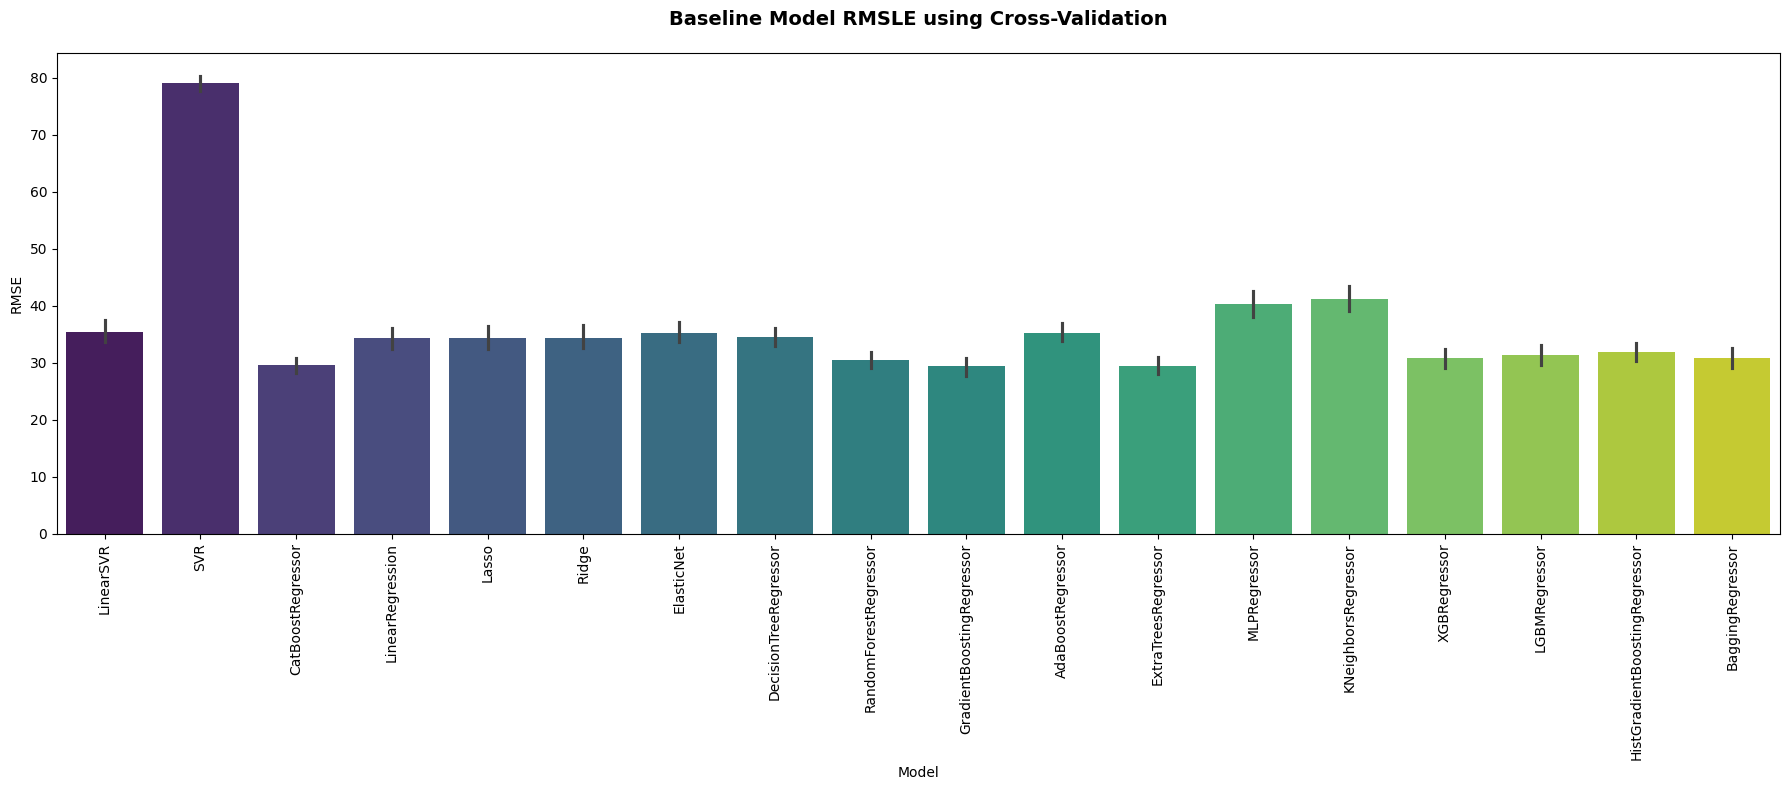

,Mean,Standard Deviation
model_name,,
GradientBoostingRegressor,29.372863,2.074669
ExtraTreesRegressor,29.493886,1.993817
CatBoostRegressor,29.659389,1.845563
RandomForestRegressor,30.474560,1.939159
XGBRegressor,30.784024,2.136943
BaggingRegressor,30.839151,2.258693
LGBMRegressor,31.369945,2.307906
HistGradientBoostingRegressor,31.952476,2.037149
Lasso,34.295038,2.525076


In [72]:
def generate_baseline_results(models=models, X=df_air_new_prepared, y=df_air_label,
                              metric="neg_mean_squared_error", cv=kfold, plot_result=False):
    entries = []
    for model in models:
        model_name = model.__class__.__name__
        model_scores = cross_val_score(model, X, y, scoring=metric, cv=cv, n_jobs=-1)
        for fold_idx, score in enumerate(model_scores):
            rmse = (-score) ** 0.5
            entries.append((model_name, fold_idx, rmse))  # negate the score here

    cv_df = pd.DataFrame(entries, columns=["model_name", "fold_id", "rmse_score"])

    # Summary
    mean = cv_df.groupby("model_name")["rmse_score"].mean()
    std = cv_df.groupby("model_name")["rmse_score"].std()

    baseline_result = pd.concat([mean, std], axis=1, ignore_index=True)
    baseline_result.columns = ["Mean", "Standard Deviation"]

    # Sort by RMSE (lower is better)
    baseline_result.sort_values(by="Mean", ascending=True, inplace=True)

    if plot_result:
        plt.figure(figsize=(18, 8))
        sns.barplot(x="model_name", y="rmse_score", data=cv_df, palette="viridis")
        plt.title("Baseline Model RMSE using Cross-Validation", fontsize=14, weight="bold", pad=20)
        plt.xlabel("Model")
        plt.ylabel("RMSE")
        plt.xticks(rotation=90)
        plt.tight_layout()
        plt.show()

    return baseline_result

generate_baseline_results(plot_result=True)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Hyperparameter tuning</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Hyperparameter tuning
    </h1>
</div>

In [128]:
def shap_plot(model, X_test, list_feature, type = None):    
     # https://towardsdatascience.com/using-shap-values-to-explain-how-your-machine-learning-model-works-732b3f40e137/
    if hasattr(X_test, "toarray"):
        X_test = X_test.toarray()
    X_test_sample = pd.DataFrame(X_test, columns=list_feature)
    explainer = shap.Explainer(model.predict, X_test_sample)
    shap_values = explainer(X_test_sample)
    if type =="bar":
        shap_importance = np.abs(shap_values.values).mean(axis=0)
        shap_df = pd.DataFrame({"feature": X_test_sample.columns, "importance": shap_importance})
        shap_df = shap_df.sort_values("importance", ascending=False).head(20)
        plt.figure(figsize=(12, 6))
        sns.barplot(x=shap_df["importance"], y=shap_df["feature"], palette="viridis", order=shap_df["feature"])
        plt.xlabel("mean(|SHAP value|)")
        plt.title("SHAP Feature Importance")
        plt.tight_layout()
        plt.show()
    else:
        shap.summary_plot(shap_values, X_test_sample)

In [118]:
# Function to evaluate regression models
def evaluate_model(model, X_train, X_val, y_train, y_val, show_shap_plot = True):
    RESET = "\033[0m"
    BLUE = "\033[94m"
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)

    # Back-transform predictions and ground truth
    y_val_real = y_val
    y_pred_real = y_pred
    
    # Metrics: RMSE
    rmse = np.sqrt(mean_squared_error(y_val_real, y_pred_real))
    print(f"Model: {model.__class__.__name__}{RESET}")
    print(f"Root Mean Squared Error (RMSE): {BLUE}{rmse:.4f}{RESET}")
    print("-" * 80)

    fig, axs = plt.subplots(1, 2, figsize=(14, 7))

    # ----- Plot 1: Predicted vs. Actual -----
    axs[0].scatter(y_val_real, y_pred_real, alpha=0.4, color="royalblue")
    axs[0].plot(
        [y_val_real.min(), y_val_real.max()],
        [y_val_real.min(), y_val_real.max()],
        "r--", lw=2, label="Perfect Prediction (y=x)"
    )
    axs[0].set_xlabel("Actual Values (AQI)")
    axs[0].set_ylabel("Predicted Values (AQI)")
    axs[0].set_title("Predicted vs. Actual (Validation Set)", weight = "bold", pad=20)
    axs[0].legend()
    axs[0].grid(True, alpha=0.2)

    # ----- Plot 2: Residual Plot -----
    residuals = y_val_real - y_pred_real
    axs[1].scatter(y_val_real, residuals, alpha=0.5)
    axs[1].axhline(0, color="red", linestyle="--", lw=2)
    axs[1].set_xlabel("Actual Values (AQI)")
    axs[1].set_ylabel("Prediction Error (Residuals)")
    axs[1].set_title("Residual Plot", weight = "bold", pad=20)
    axs[1].grid(True, alpha=0.2)

    # Tối ưu bố cục
    plt.tight_layout()
    plt.show() 

    if show_shap_plot:
        shap_plot(model = model, X_test = X_val, list_feature = list_feature_prepared)

    return rmse

In [74]:
X_val = start_test_set.drop("AQI", axis=1)
y_val = start_test_set["AQI"].copy()
X_val_prepared = preprocessor.transform(X_val)

## GradientBoostingRegressor

In [83]:
param_gb = {
    "n_estimators": 297,
    "learning_rate": 0.06995551979147836,
    "max_depth": 3,
    "min_samples_split": 12,
    "min_samples_leaf": 2,
    "subsample": 0.711950247120126,
    "loss": "squared_error",
    "validation_fraction": 0.05526589394055614,
    "n_iter_no_change": 24,
    "tol": 0.002145872968418365,
    "random_state": seed,
 }

model_gb = GradientBoostingRegressor(**param_gb)
model_gb

GradientBoostingRegressor(learning_rate=0.06995551979147836, min_samples_leaf=2,
                          min_samples_split=12, n_estimators=297,
                          n_iter_no_change=24, random_state=42,
                          subsample=0.711950247120126, tol=0.002145872968418365,
                          validation_fraction=0.05526589394055614)

Model: GradientBoostingRegressor
Root Mean Squared Error (RMSE): 31.3055
--------------------------------------------------------------------------------


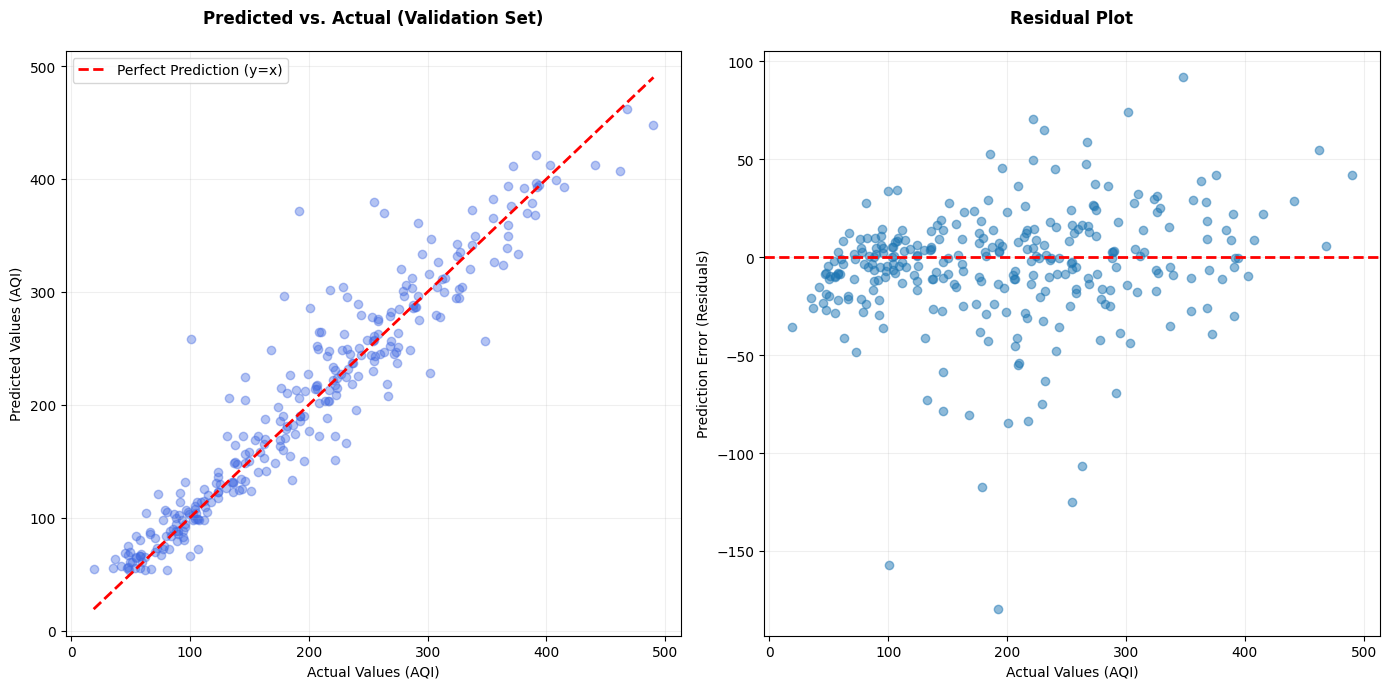

In [119]:
weight_rmse_gb = evaluate_model(model = model_gb, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, show_shap_plot = False)

## ExtraTreesRegressor

In [89]:
param_etr = {
    "n_estimators": 98,
    "max_depth": 25,
    "min_samples_split": 5,
    "min_samples_leaf": 1,
    "max_features": 0.5,
    "bootstrap": False,
    "criterion": "squared_error",
    "random_state": 42,
    "n_jobs": -1
 }

model_etr = ExtraTreesRegressor(**param_etr)
model_etr

ExtraTreesRegressor(max_depth=25, max_features=0.5, min_samples_split=5,
                    n_estimators=98, n_jobs=-1, random_state=42)

Model: ExtraTreesRegressor
Root Mean Squared Error (RMSE): 30.9340
--------------------------------------------------------------------------------


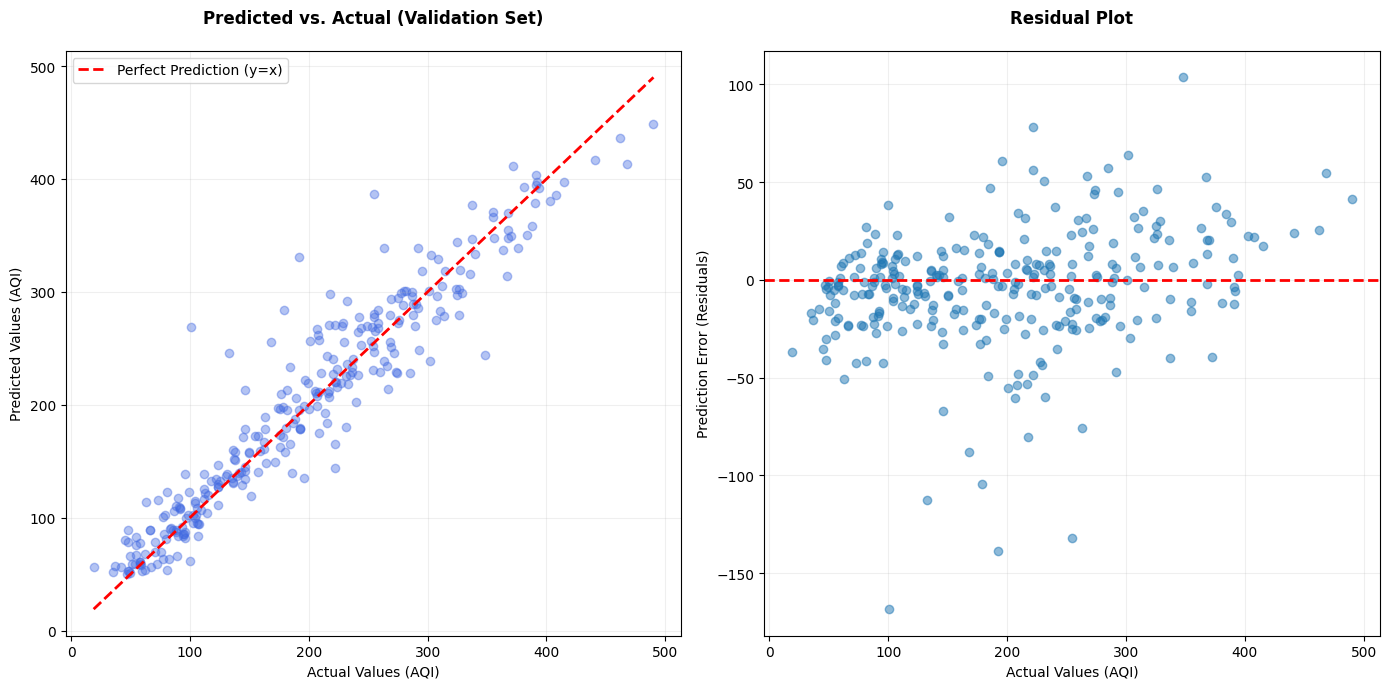

In [120]:
weight_rmse_etr = evaluate_model(model = model_etr, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, show_shap_plot = False)

## CatBoostRegressor

In [96]:
param_cb = {
	"iterations": 951,
	"depth": 4,
	"learning_rate": 0.02686110757783253,
	"l2_leaf_reg": 6.058349801450315,
	"bootstrap_type": "Bernoulli",
	"subsample": 0.5854487582871963,
    "loss_function": "RMSE",
    "eval_metric": "RMSE",
    "verbose": 0,
    "random_seed": seed
}

model_cb = CatBoostRegressor(**param_cb)
model_cb

Model: CatBoostRegressor
Root Mean Squared Error (RMSE): 31.0544
--------------------------------------------------------------------------------


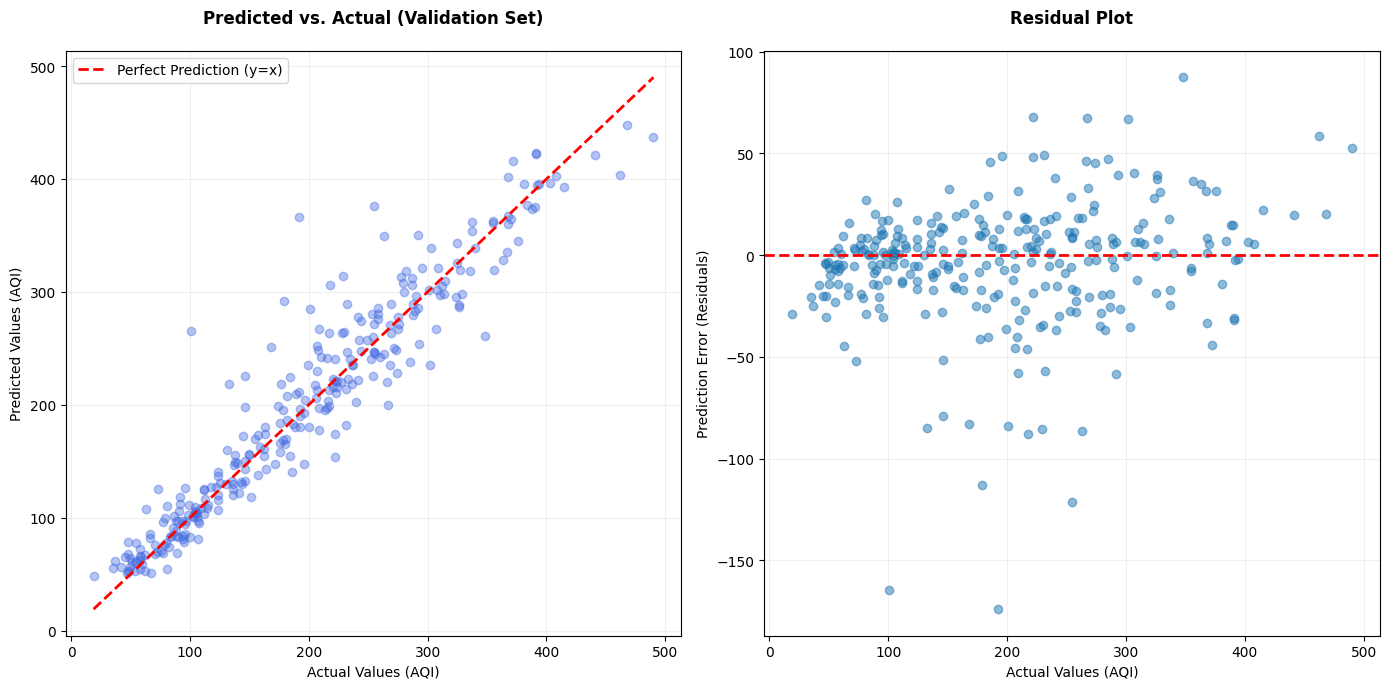

In [121]:
weight_rmse_cb = evaluate_model(model = model_cb, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, show_shap_plot = False)

## RandomForestRegressor

In [100]:
param_rfr = {
    "n_estimators": 592,
    "max_depth": 7,
    "min_samples_split": 18,
    "min_samples_leaf": 1,
    "max_features": None,
    "bootstrap": True,
    "criterion": "squared_error",
    "random_state": 42,
    "n_jobs": -1
}

model_rfr = RandomForestRegressor(**param_rfr)
model_rfr

RandomForestRegressor(max_depth=7, max_features=None, min_samples_split=18,
                      n_estimators=592, n_jobs=-1, random_state=42)

Model: RandomForestRegressor
Root Mean Squared Error (RMSE): 31.7327
--------------------------------------------------------------------------------


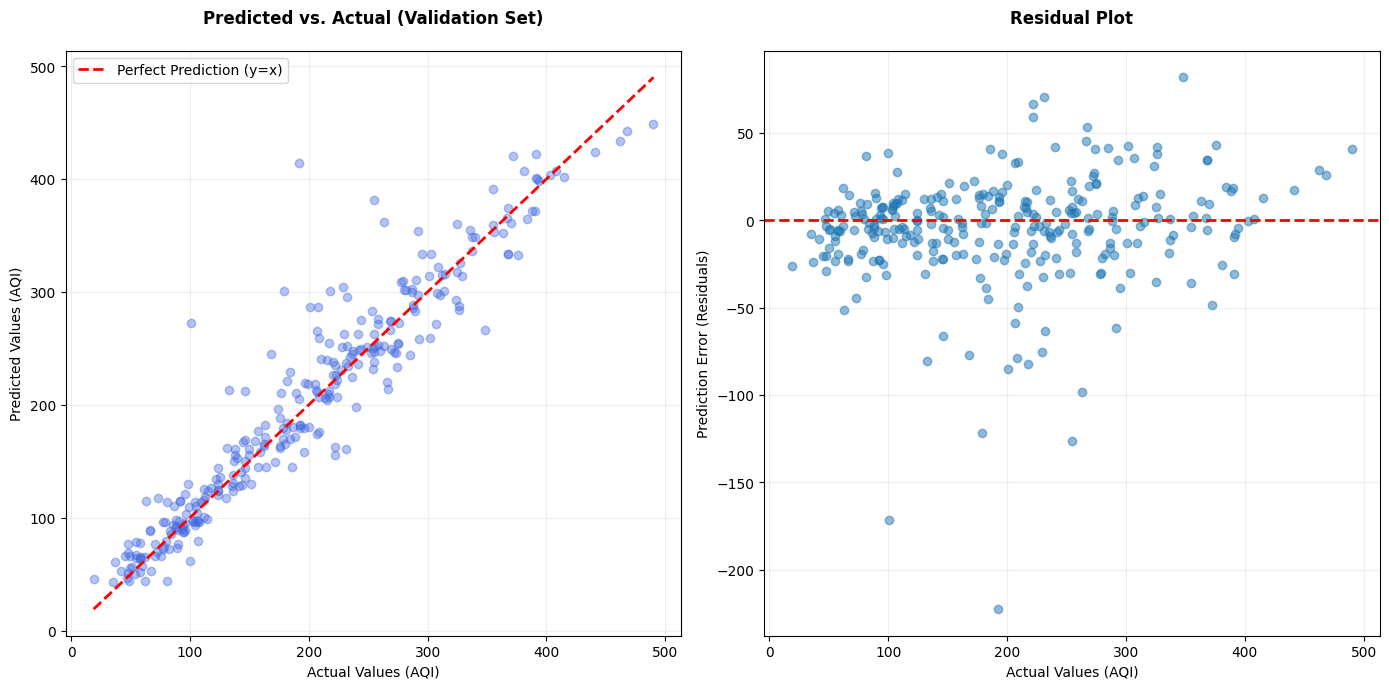

In [122]:
weight_rmse_rfr = evaluate_model(model = model_rfr, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, show_shap_plot = False)

## XGBRegressor

In [105]:
param_xgb = {
    "n_estimators": 376, 
    "max_depth": 3, 
    "learning_rate": 0.03599674351682786, 
    "subsample": 0.7453284504463005, 
    "colsample_bytree": 0.9852507278987472, 
    "gamma": 2.405635031822836, 
    "reg_alpha": 8.782586652468007,
    "reg_lambda": 0.33634542550590113,
    "min_child_weight": 1,
    "eval_metric": "rmse",
    "random_state": 42,
    "n_jobs": -1
}

model_xgb = XGBRegressor(**param_xgb)
model_xgb

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.9852507278987472, device=None,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric='rmse', feature_types=None, feature_weights=None,
             gamma=2.405635031822836, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.03599674351682786,
             max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=376, n_jobs=-1,
             num_parallel_tree=None, ...)

Model: XGBRegressor
Root Mean Squared Error (RMSE): 30.8980
--------------------------------------------------------------------------------


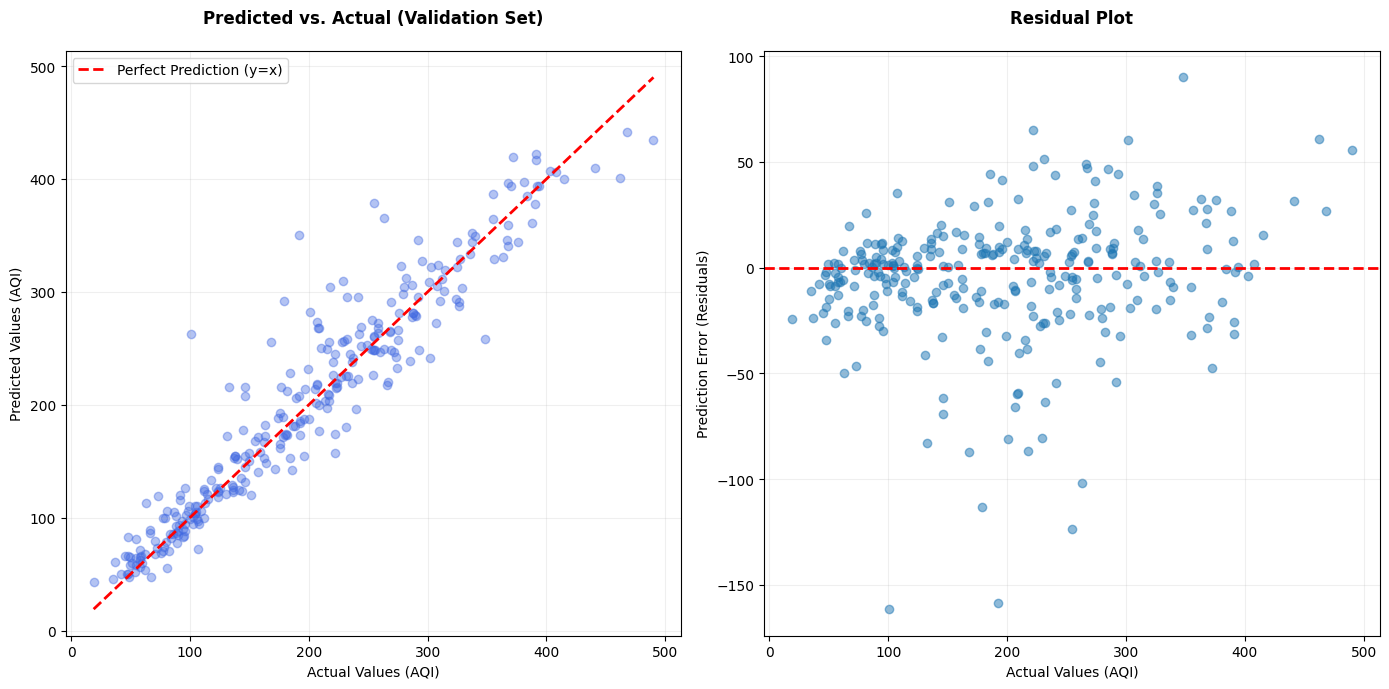

In [123]:
weight_rmse_xgb = evaluate_model(model = model_xgb, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, show_shap_plot = False)

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Conclusion</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Conclusion
    </h1>
</div>


## VotingClassifier

In [124]:
from sklearn.ensemble import VotingRegressor

voting_reg = VotingRegressor(estimators=[
    ("gbr", model_gb),
    ("etr", model_etr),
    ("cb", model_cb),
    ("rfr", model_rfr),
    ("xgb", model_xgb)
], n_jobs=-1, weights=[weight_rmse_gb, weight_rmse_etr, weight_rmse_cb, weight_rmse_rfr, weight_rmse_xgb])

cv_scores = cross_val_score(
    voting_reg,
    X=df_air_new_prepared,
    y=df_air_label,
    cv=kfold,
    scoring="neg_root_mean_squared_error",
    n_jobs=-1
)

mean_score = -cv_scores.mean()
std_score = cv_scores.std()

print(f"Cross-validated RMSE (mean ± std): {mean_score:.4f} ± {std_score:.4f}")

Cross-validated RMSE (mean ± std): 28.2170 ± 1.6886


Model: VotingRegressor
Root Mean Squared Error (RMSE): 30.4663
--------------------------------------------------------------------------------


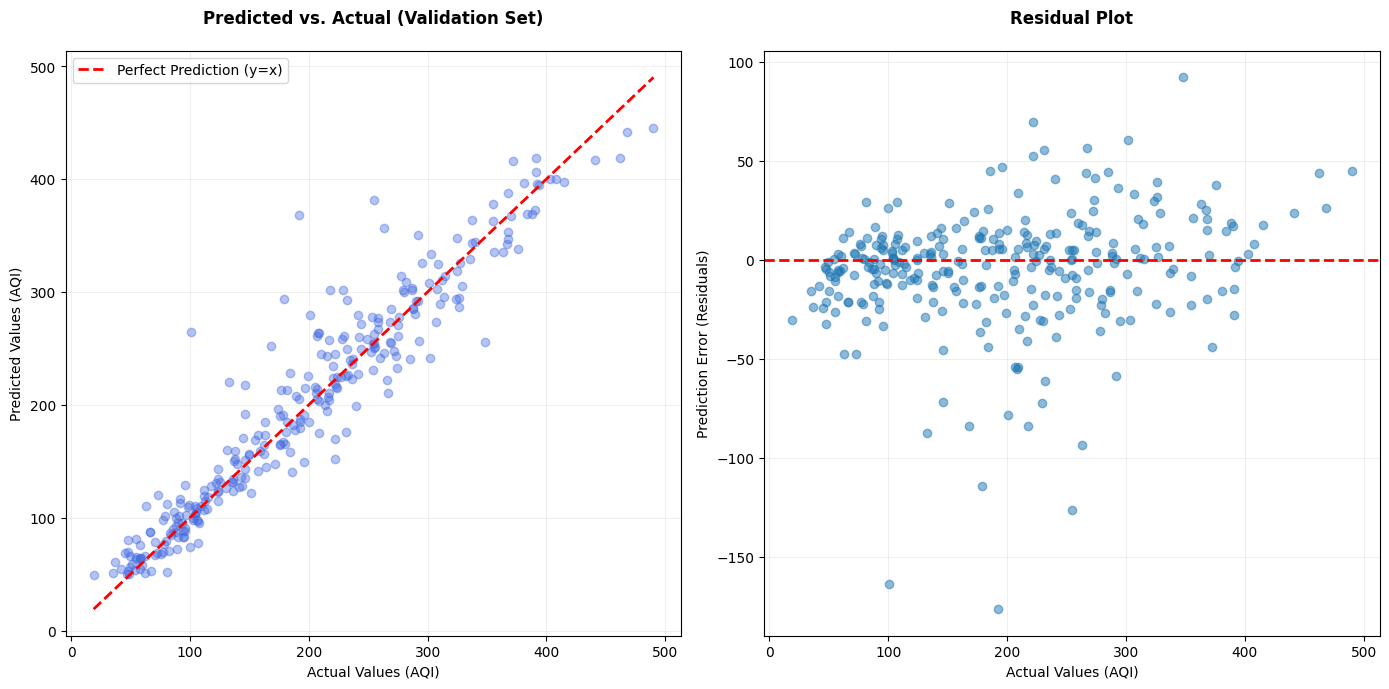

In [125]:
weight_rmse_vc = evaluate_model(model = voting_reg, X_train = df_air_new_prepared, 
                   X_val = X_val_prepared , y_train = df_air_label, y_val=y_val, show_shap_plot = False)

PermutationExplainer explainer: 201it [06:57,  2.10s/it]                         


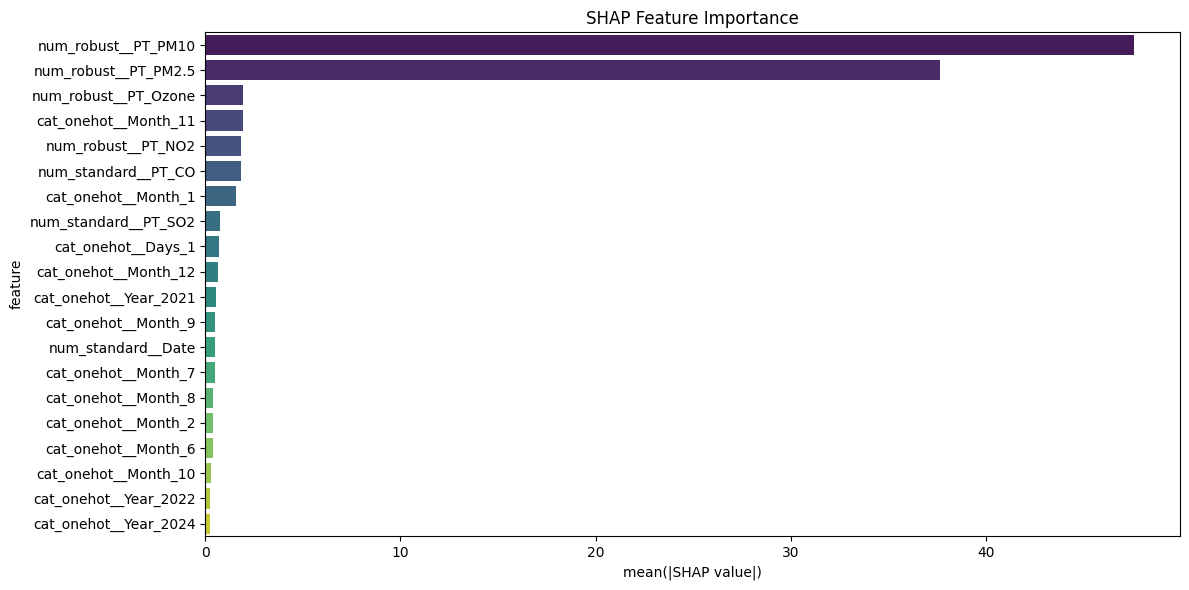

In [129]:
shap_sample = X_val_prepared.iloc[:200] if isinstance(X_val_prepared, pd.DataFrame) else X_val_prepared[:200]
shap_plot(model=voting_reg, X_test=shap_sample, list_feature=list_feature_prepared, type="bar")

**SHAP Feature Importance – Key Insights**

**1. Dominant Features**

* **`num_robust__PT_PM10`** and **`num_robust__PT_PM2.5`** clearly dominate the model’s predictions, with the highest mean(|SHAP value|).
* **`num_robust__PT_Ozone`** ranks third but with a significantly smaller impact compared to PM10 and PM2.5.

**2. Moderate-Impact Features**

* **`num_robust__PT_NO2`**, **`num_standard__PT_CO`**, and **`num_standard__PT_SO2`** show moderate contributions.
* Some time-based categorical features (e.g., `Month_11`, `Month_1`, `Days_1`) have measurable but lower influence, suggesting mild seasonal effects.

**3. Low-Impact Features**

* Other months (`Month_2`, `Month_6`, `Month_7`, `Month_8`, `Month_9`, `Month_10`, `Month_12`) and year indicators (`Year_2021`, `Year_2022`, `Year_2024`) contribute minimally to predictions.

**4. Overall Interpretation**

* The model relies heavily on particulate matter concentrations (PM10 & PM2.5), which aligns with their strong correlation to AQI.
* Ozone, NO₂, CO, and SO₂ serve as secondary contributors.
* Temporal variables play a relatively minor role, likely because the AQI is measured directly from sensor readings.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

# <span style="color:transparent;">Recommendation</span>

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        Recommendation
    </h1>
</div>


**Recommendations Based on SHAP Insights**

1. **Focus on PM10 & PM2.5 monitoring**

   * These two pollutants dominate AQI predictions.
   * **Recommendation:** Increase measurement frequency, ensure sensor calibration, and prioritize control policies targeting these pollutants.

2. **Secondary pollutant management**

   * Ozone, NO₂, CO, and SO₂ still contribute meaningfully.
   * **Recommendation:** Maintain tracking, but focus intervention efforts proportionally to their impact.

<!-- Include Google Fonts for a modern font -->
<link href="https://fonts.googleapis.com/css2?family=Roboto:wght@700&display=swap" rel="stylesheet">

<div style="
    border-radius: 15px; 
    border: 2px solid #003366; 
    padding: 10px; 
    background: linear-gradient(135deg, #003366, #336699 30%, #66ccff 70%, #99ccff); 
    text-align: center; 
    box-shadow: 0px 4px 8px rgba(0, 0, 0, 0.5);
">
    <h1 style="
        color: #FFFFFF; 
        text-shadow: 2px 2px 4px rgba(0, 0, 0, 0.7); 
        font-weight: bold; 
        margin-bottom: 5px; 
        font-size: 28px; 
        font-family: 'Roboto', sans-serif;
        letter-spacing: 1px;
    ">
        🙏 Thanks for Reading! 🚀
    </h1>
    <p style="color: #ffffff; font-size: 18px; text-align: center;">
        Happy Coding! 🙌😊
    </p>
</div>
